<a href="https://colab.research.google.com/github/aprizal543/Machine_Learning_Regresi/blob/main/Prediksi_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

test = pd.read_csv('test.csv')
# Melihat informasi dalam Dataset
test.info()

# Mendapatkan informasi deskriptif Dataset
test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [ ]:
# Memeriksa jumlah yang hilang disetiap kolom
missing_values = test.isnull().sum()
missing_values[missing_values > 0]

,0
MSZoning,4
LotFrontage,227
Alley,1352
Utilities,2
Exterior1st,1
Exterior2nd,1
MasVnrType,894
MasVnrArea,15
BsmtQual,44
BsmtCond,45


In [ ]:
# Memisahkan missing values  kurang dari 75% dan lebih dari 75%
less = missing_values[missing_values < 1000].index
over = missing_values[missing_values > 1000].index


In [ ]:
# Mengisi nilai yang hilang dengan median pada kolom numerik
numeric_features = test[less].select_dtypes(include=['number']).columns
test[numeric_features] = test[numeric_features].fillna(test[numeric_features].median())

In [ ]:
# Mengisi nilai yang hilang dengan mode untk kolom kategorikal
kategorikal_features = test[less].select_dtypes(include=['object']).columns
for column in kategorikal_features:
    test [column] = test[column].fillna(test[column].mode()[0])


# Menghapus kolom dengan terlalu banyak nilai
# # Ubah nama DataFrame menjadi 'df' supaya data asli tidak berubah dan dapat kita banding sebelum dan sesuah proses
df = test.drop(columns=over)

In [ ]:
# Memeriksa kembali missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


,0


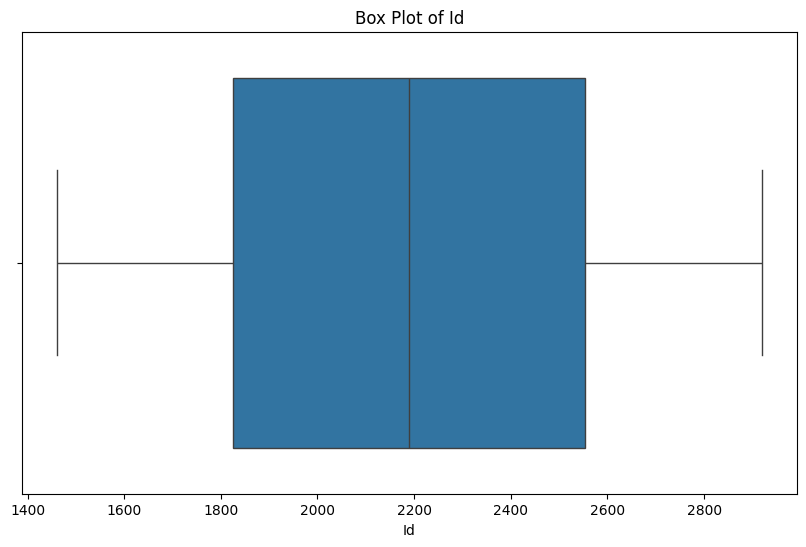

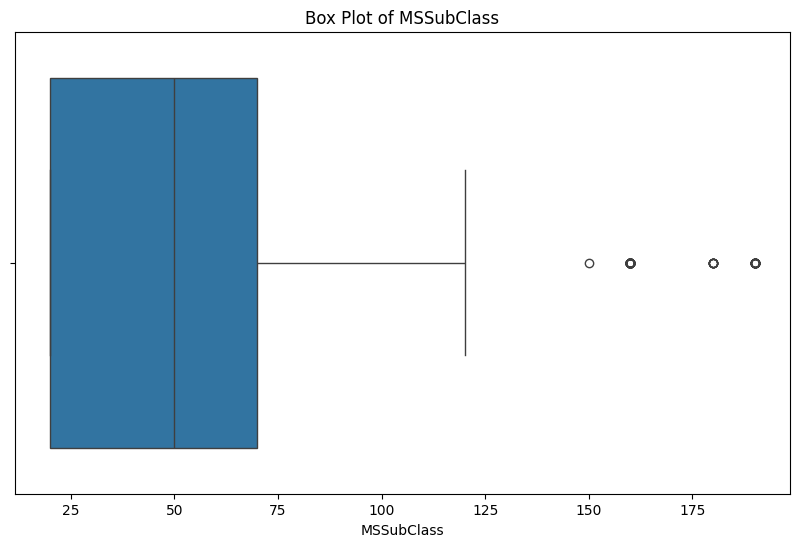

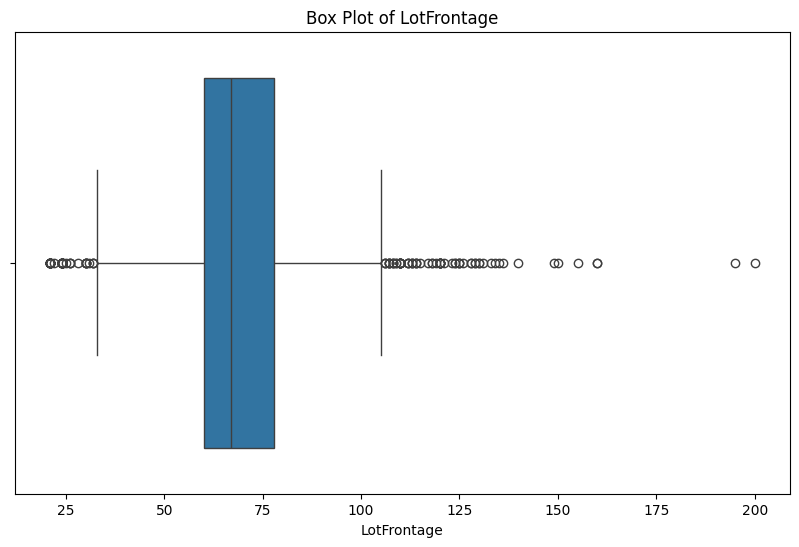

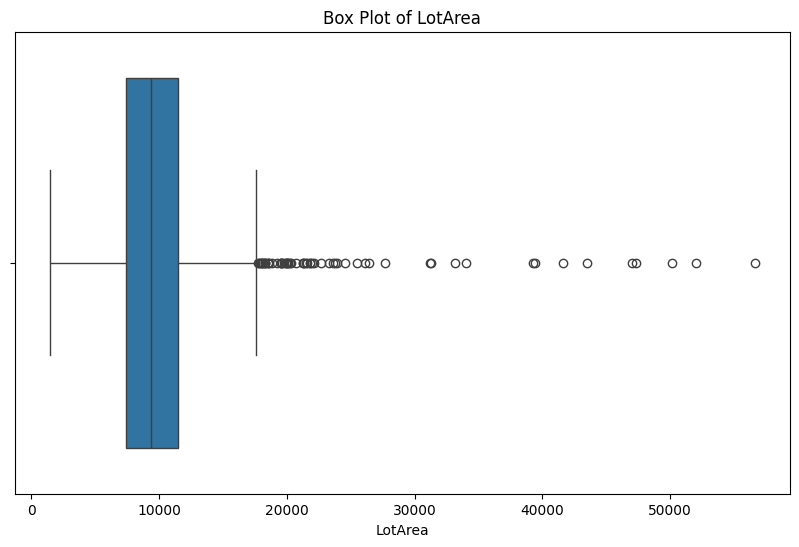

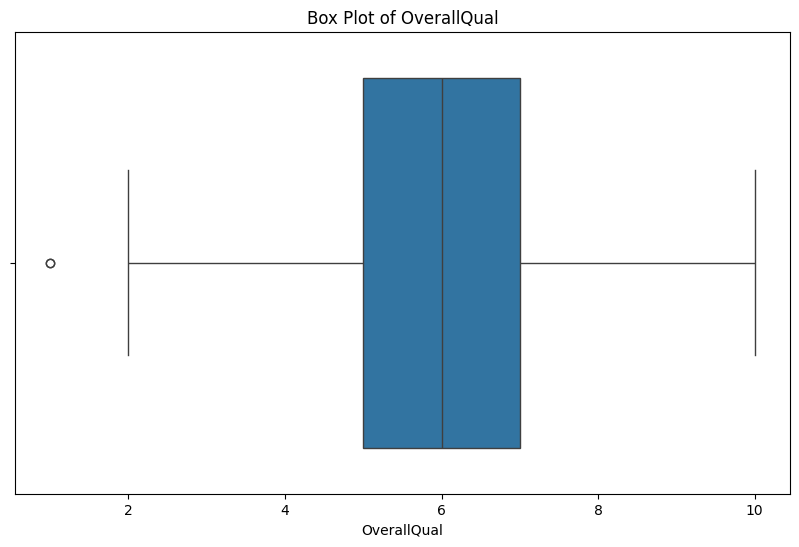

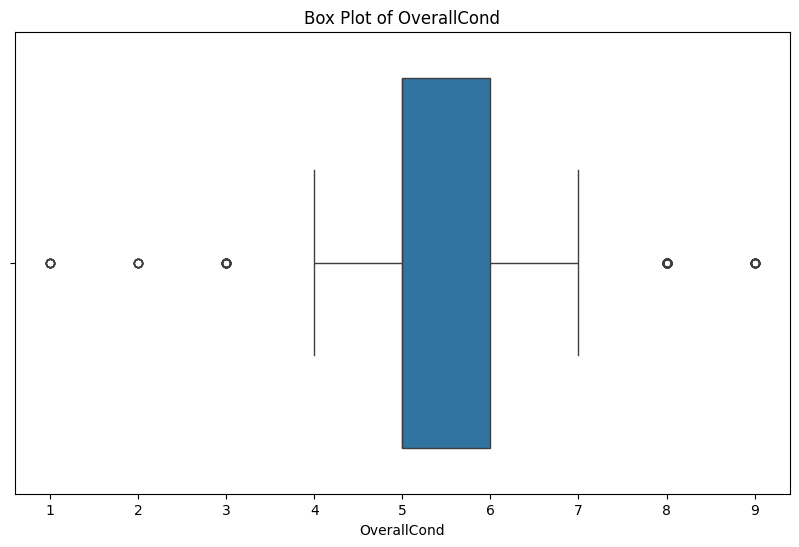

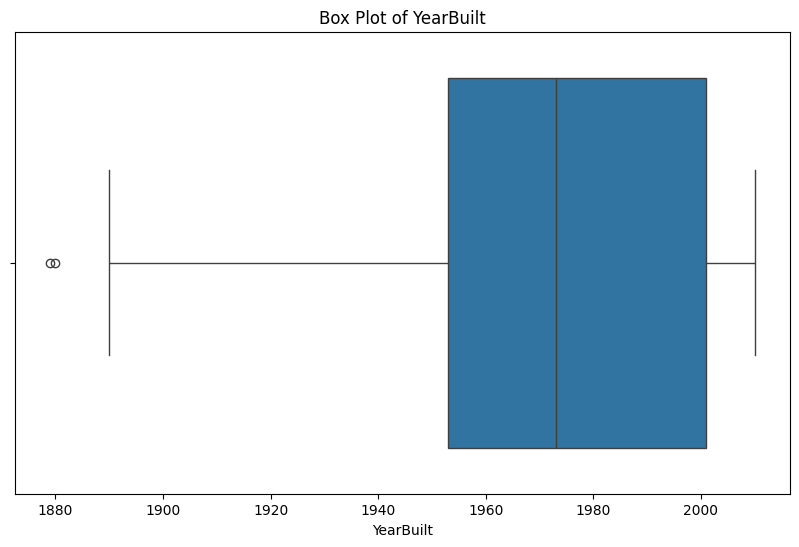

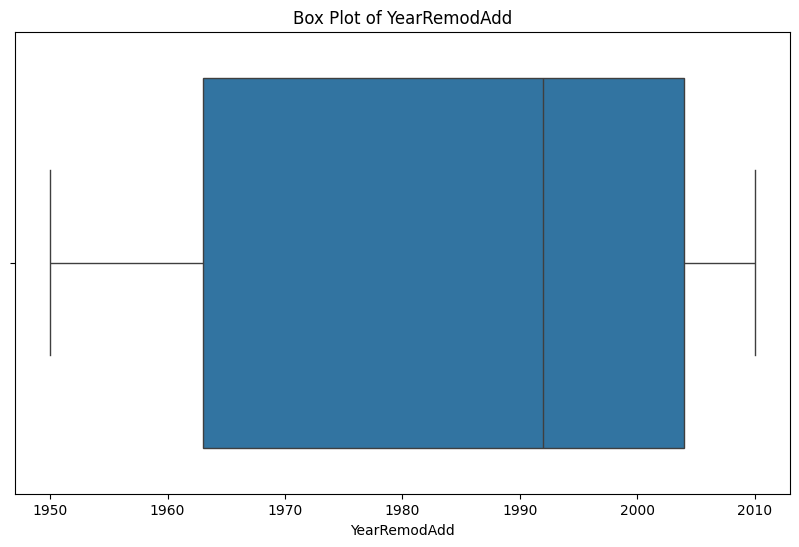

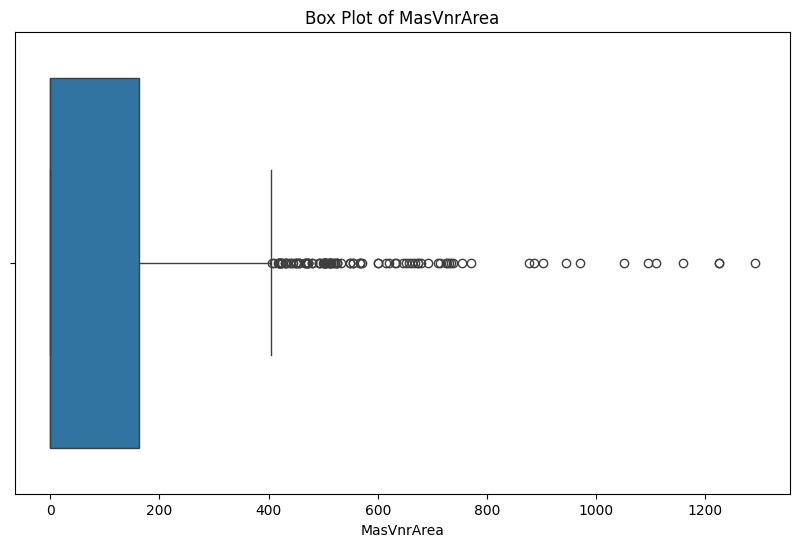

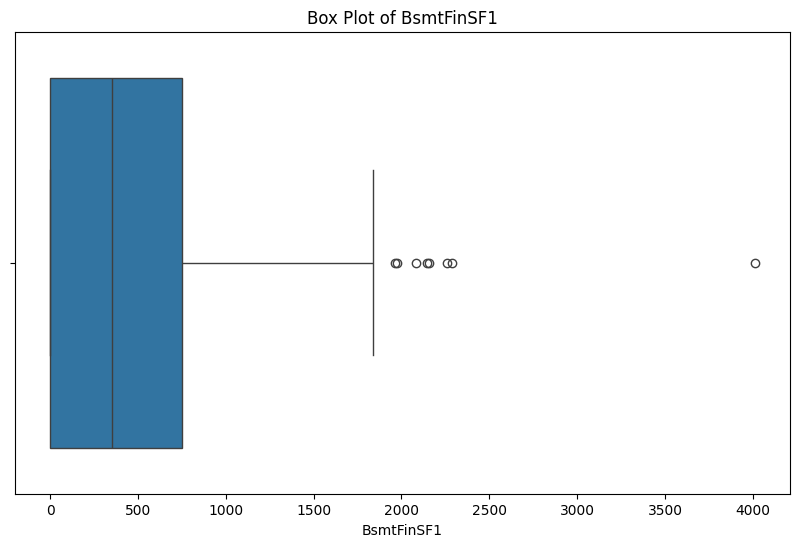

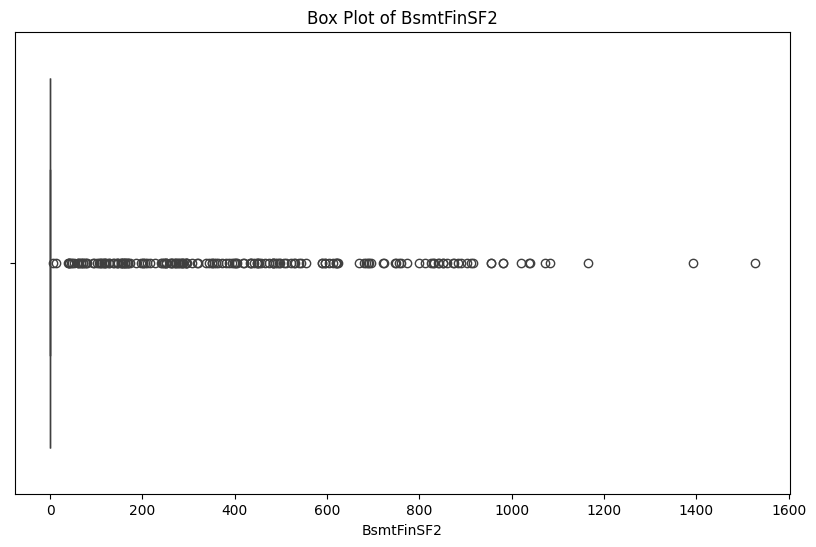

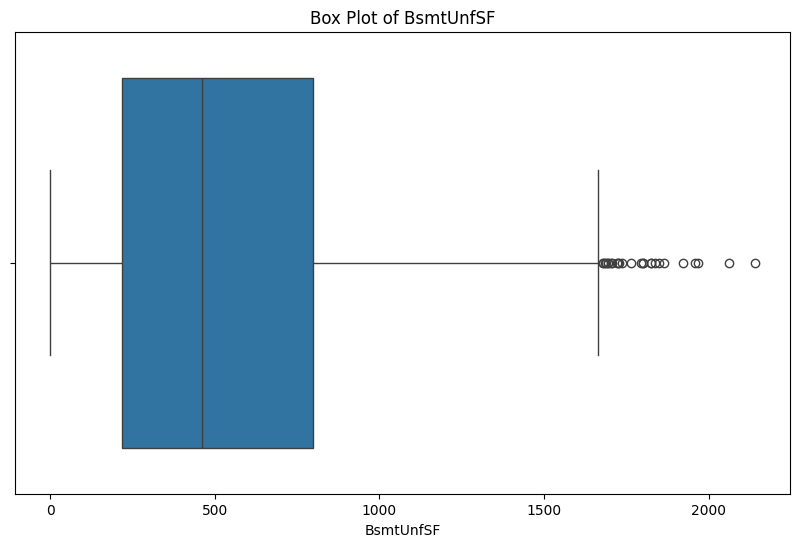

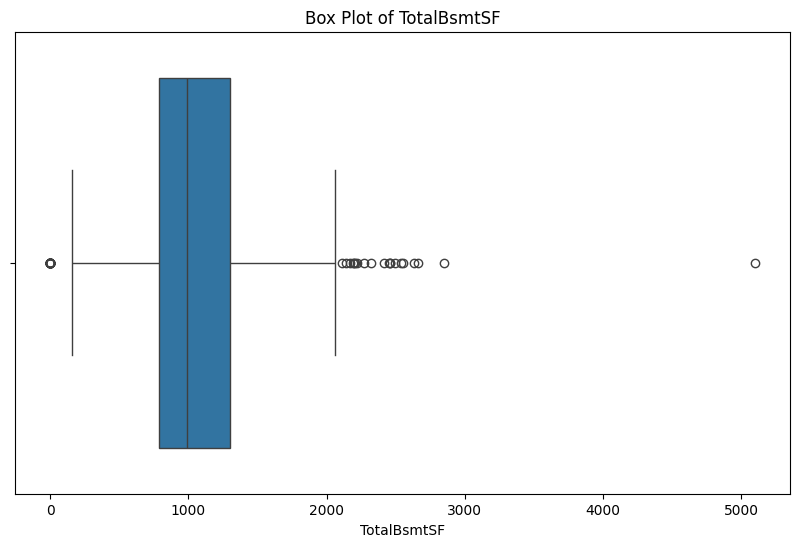

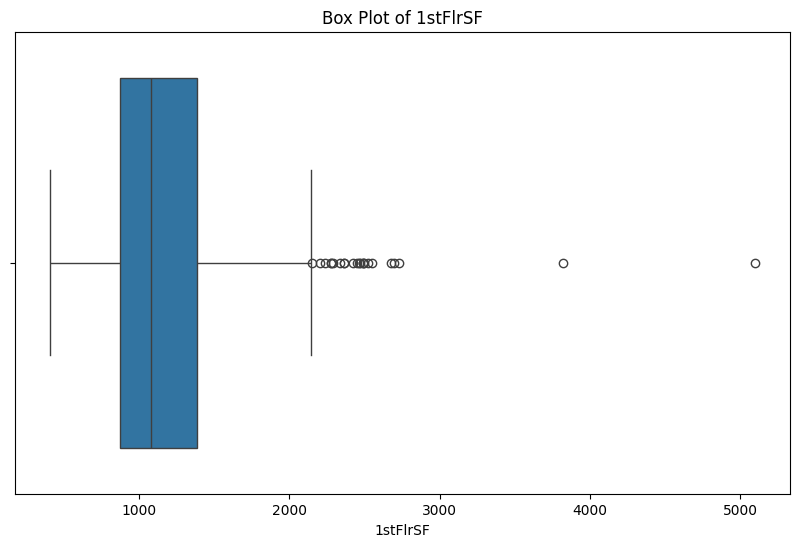

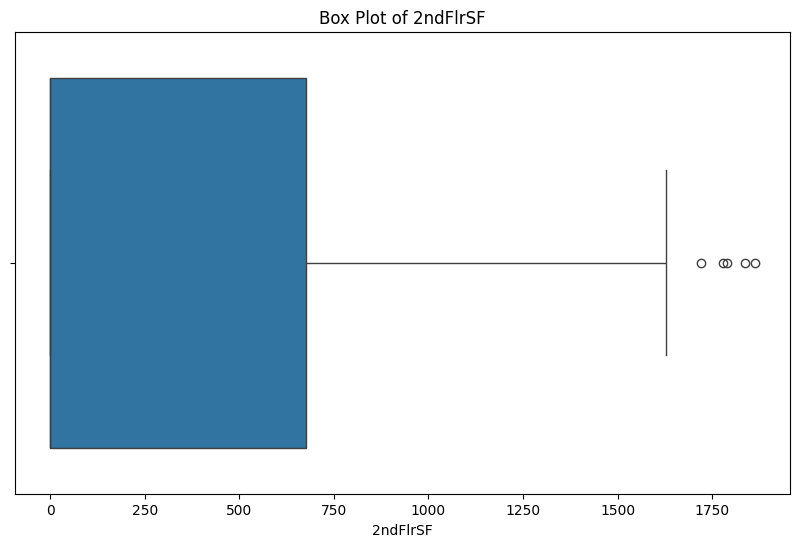

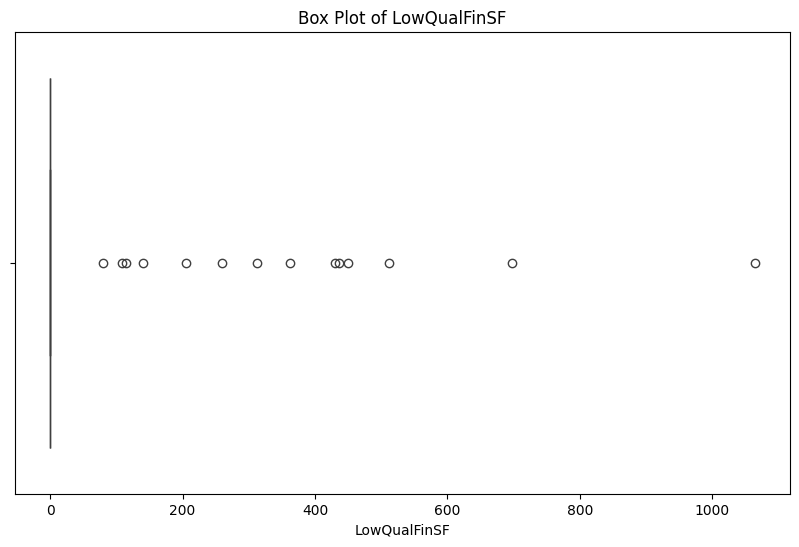

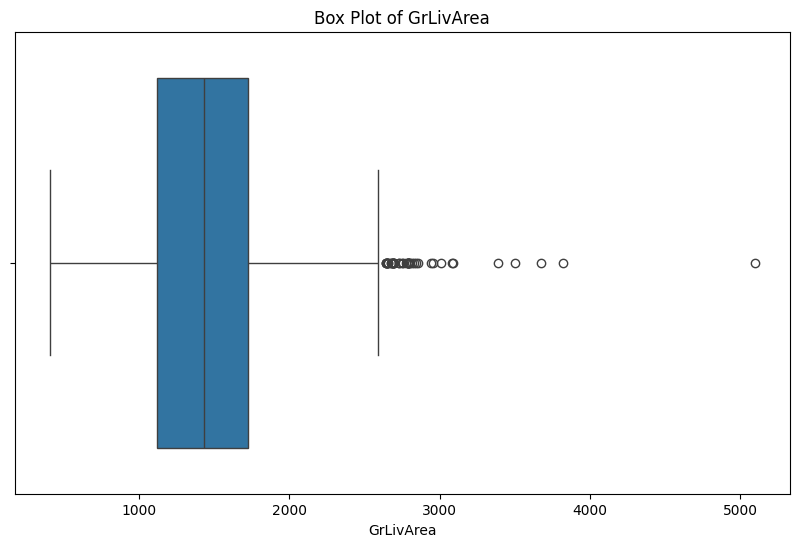

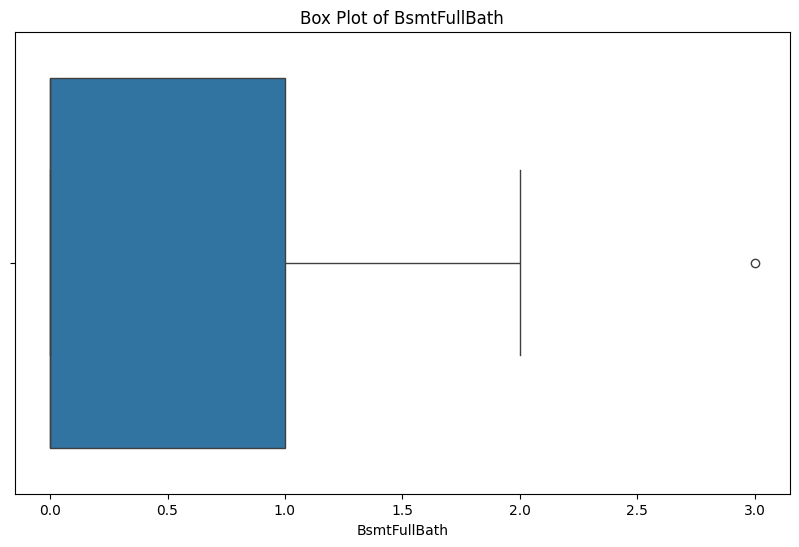

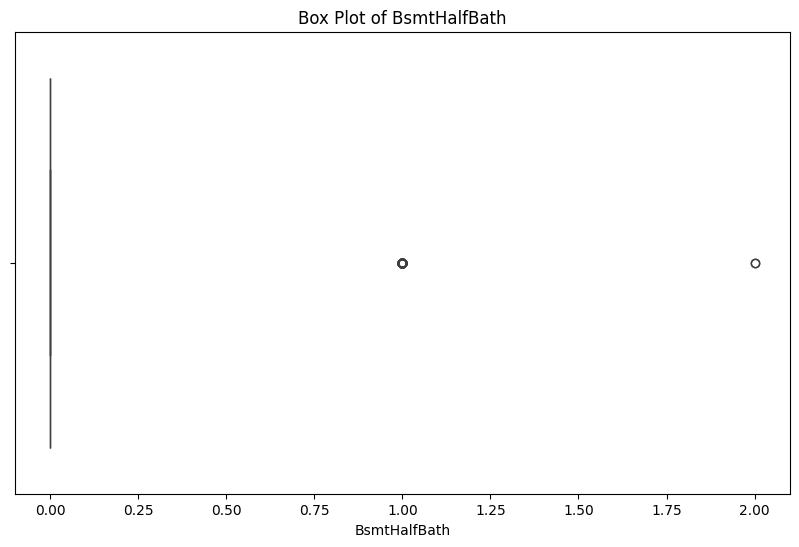

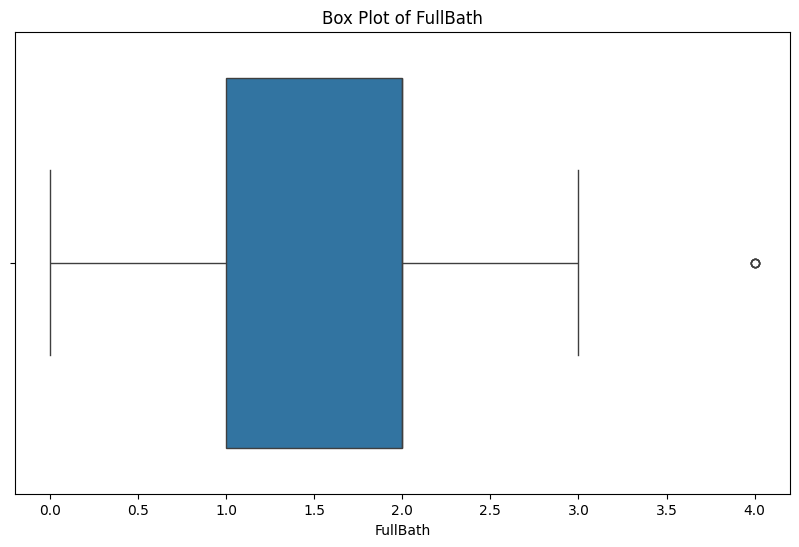

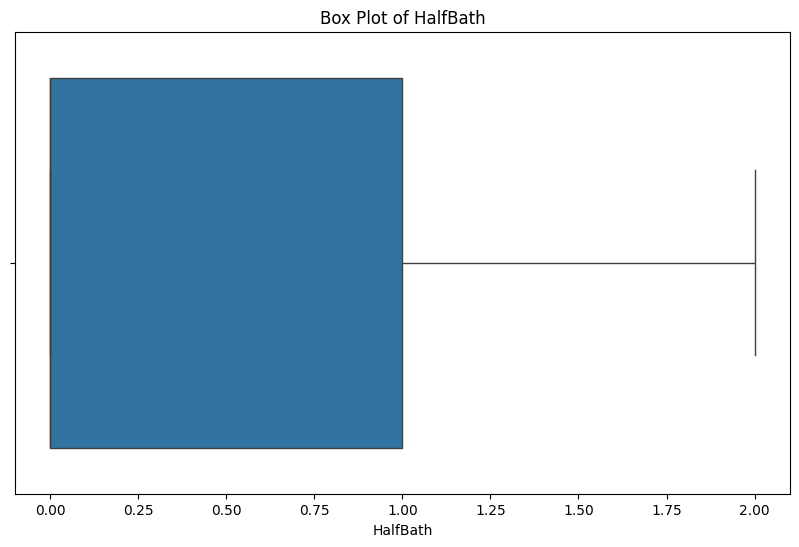

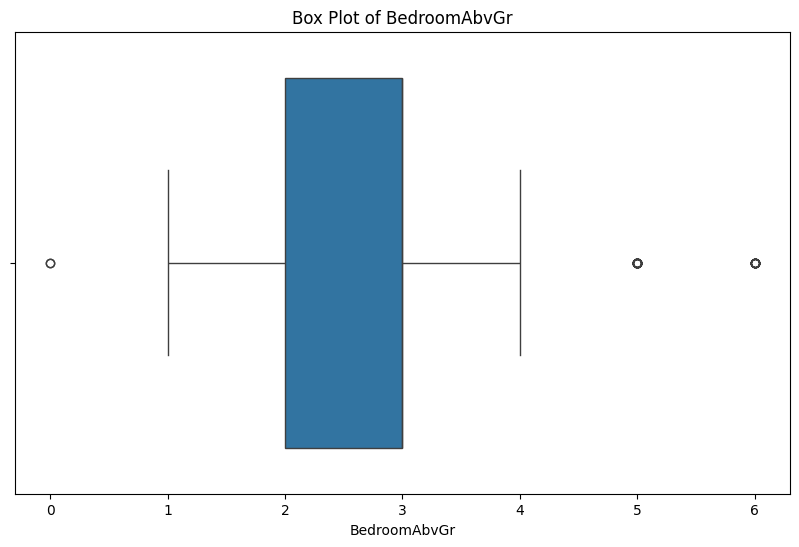

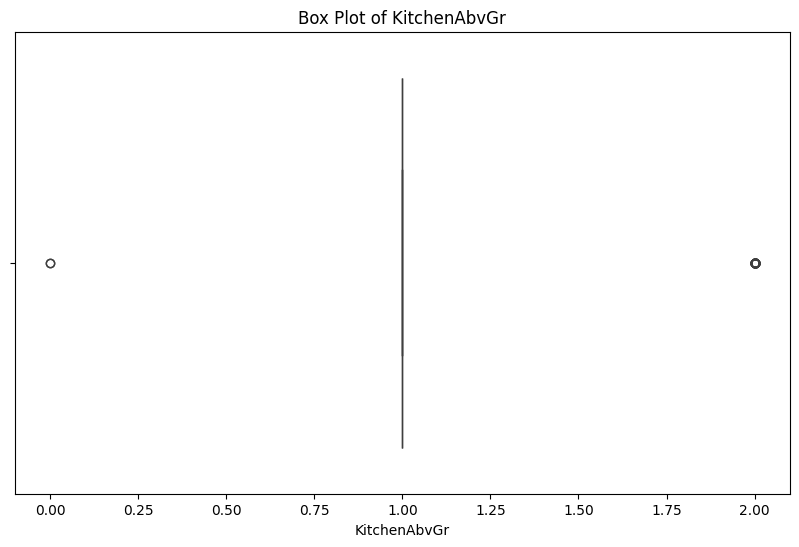

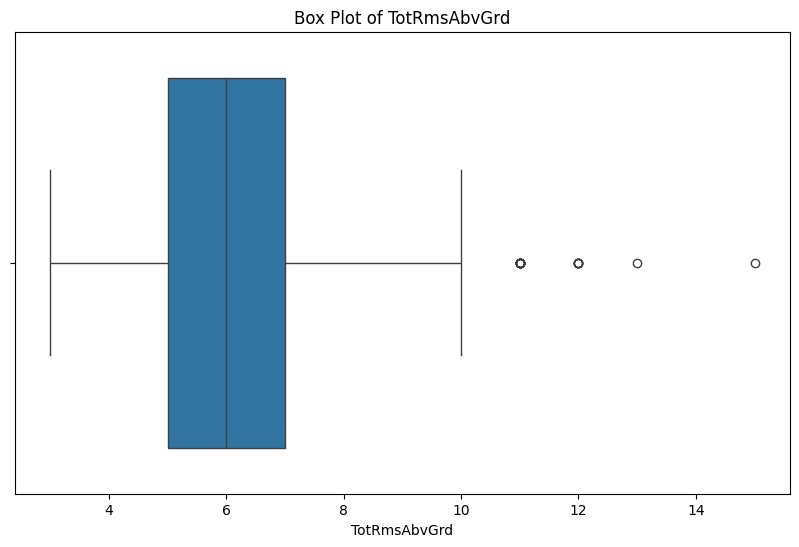

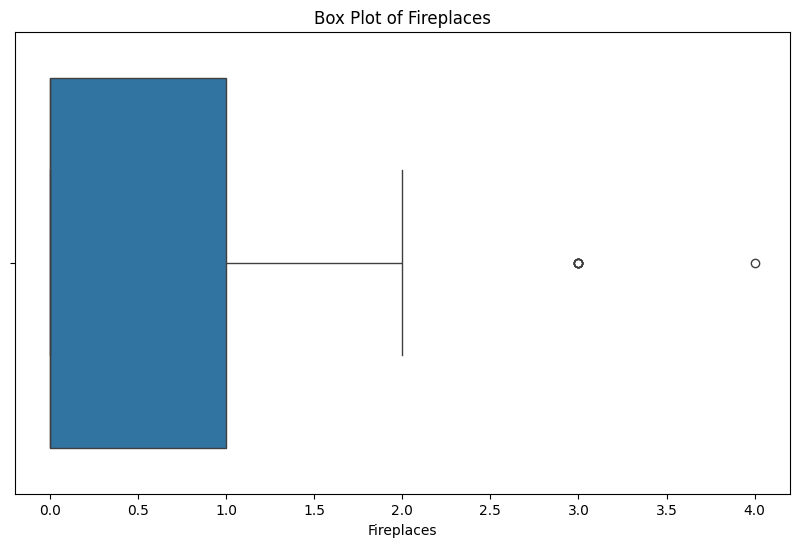

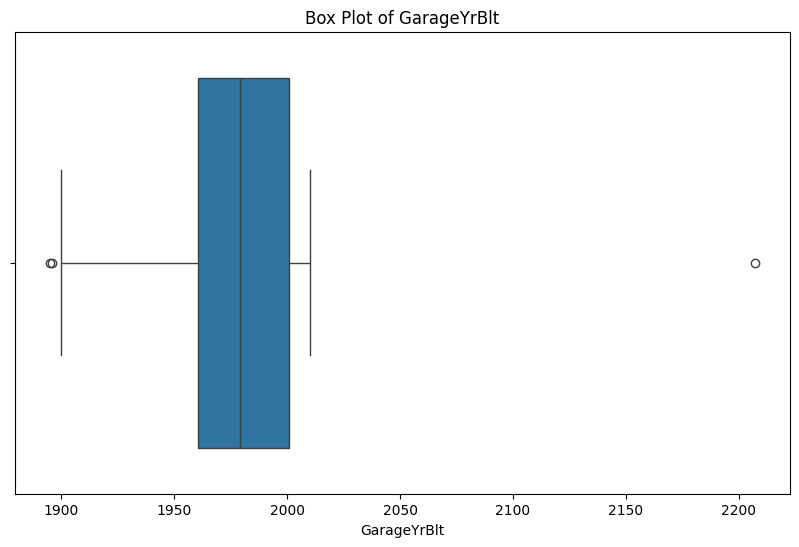

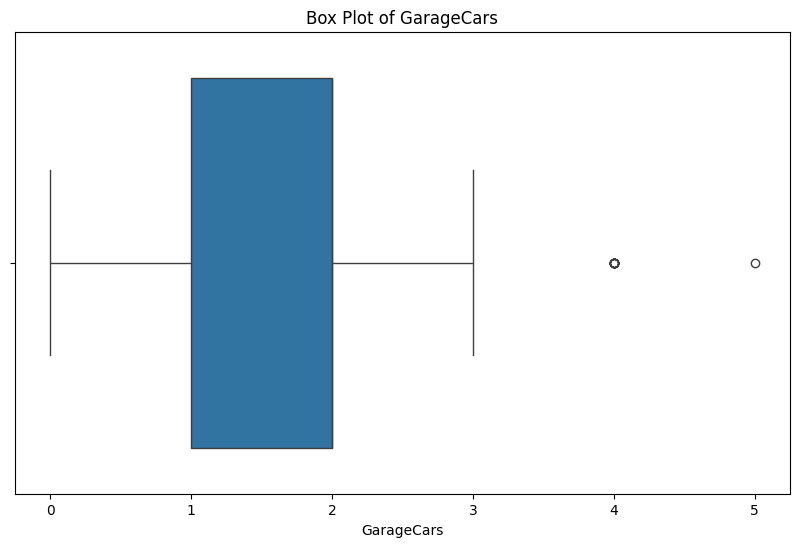

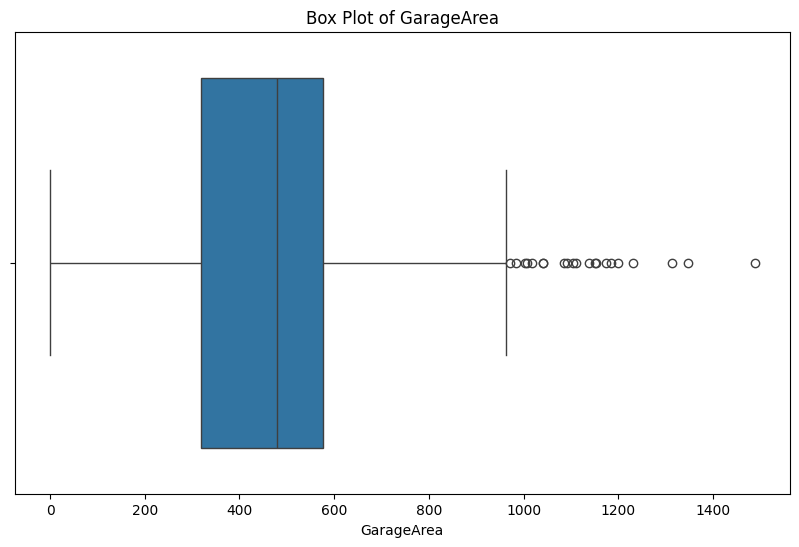

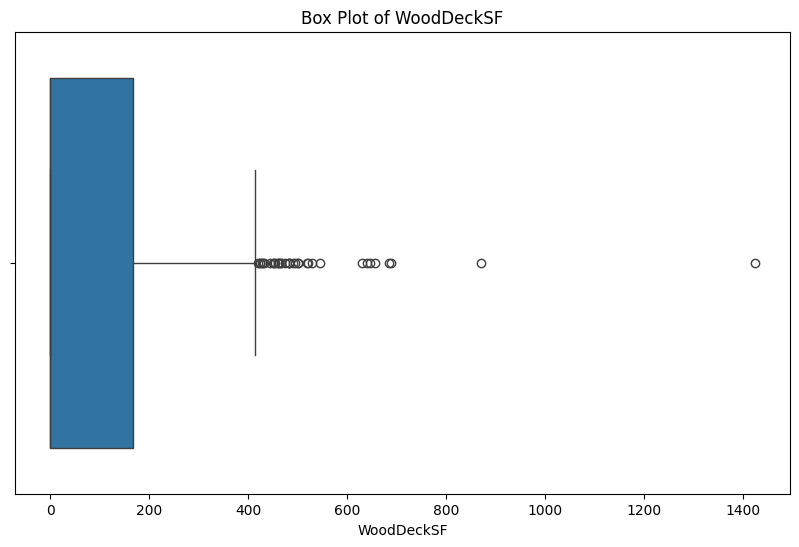

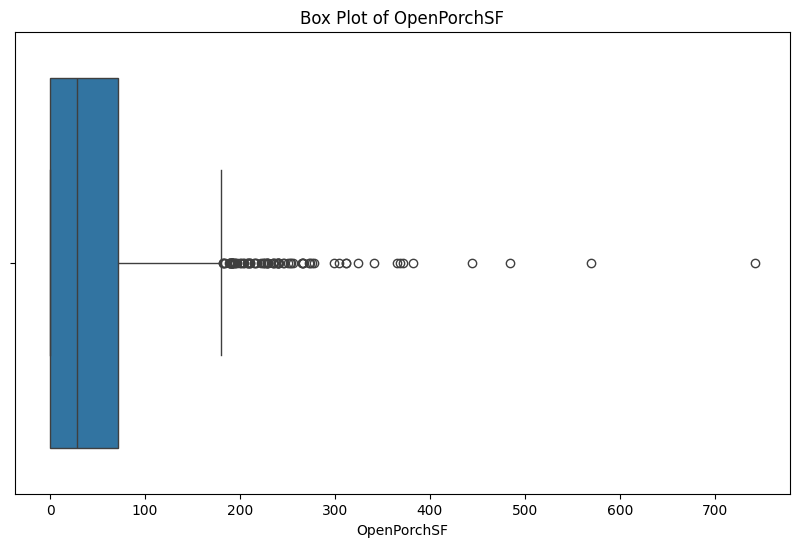

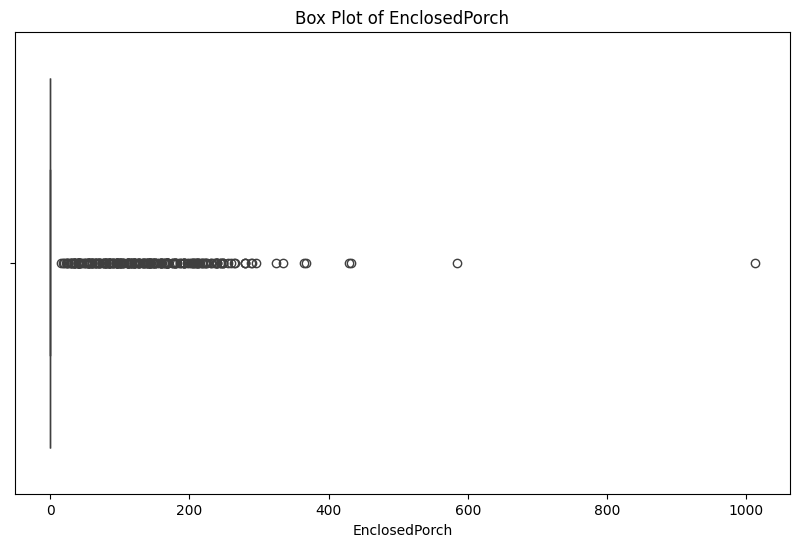

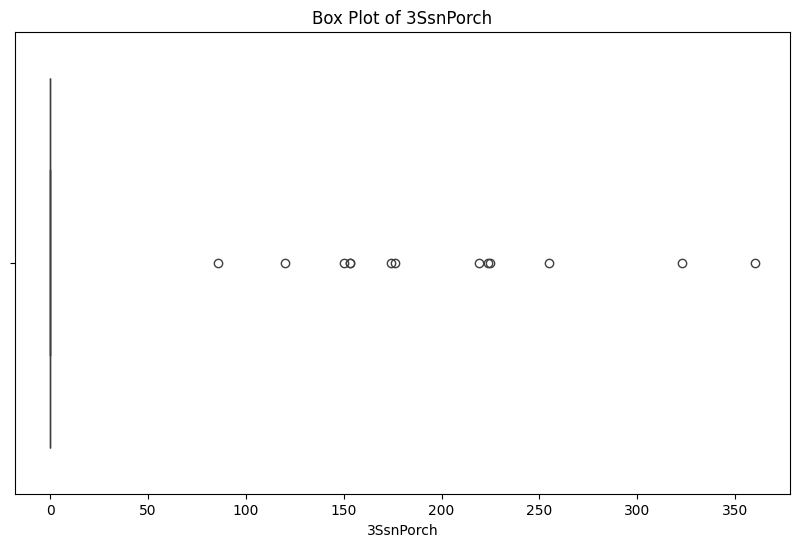

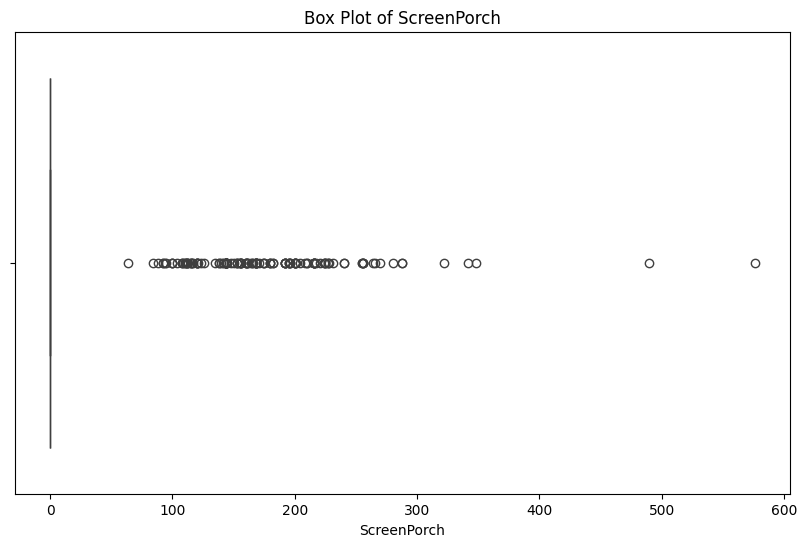

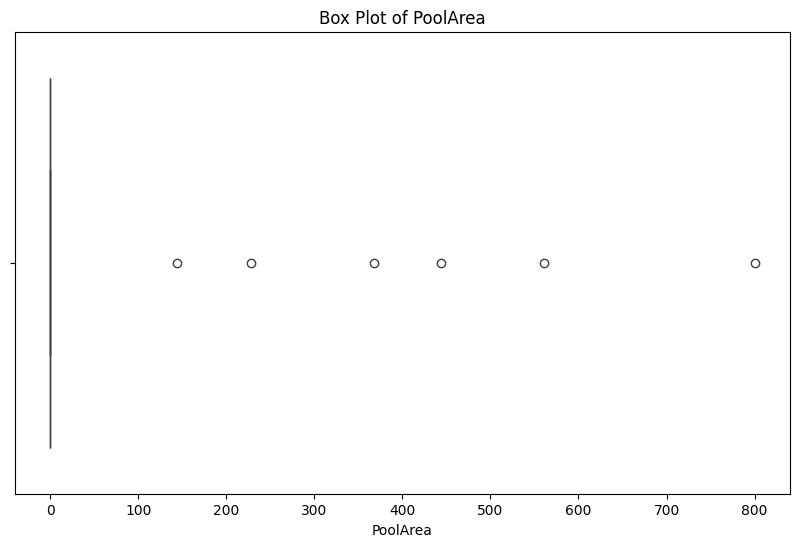

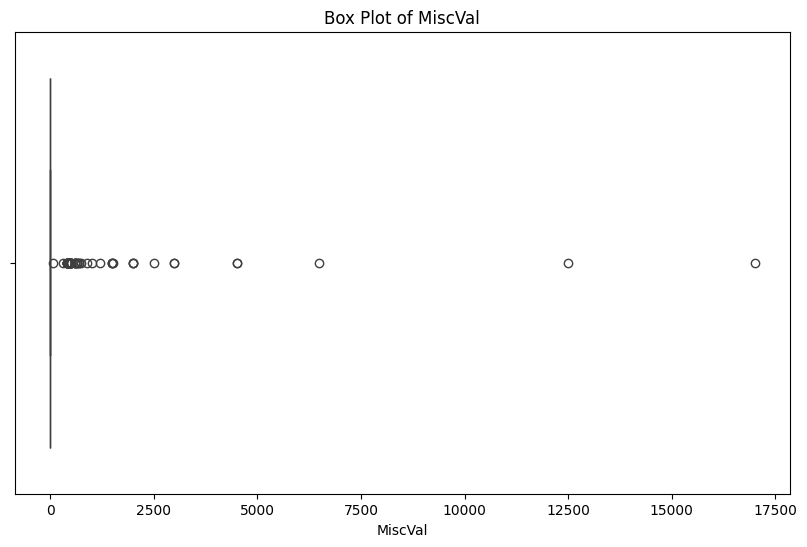

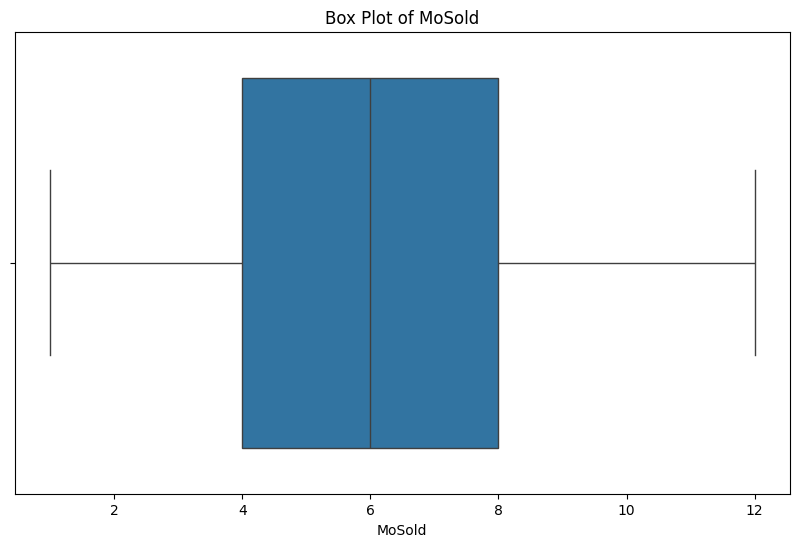

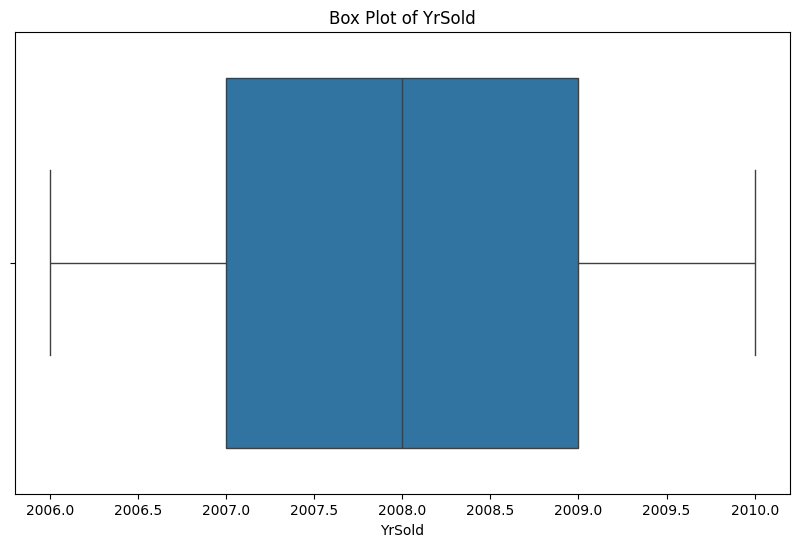

In [ ]:
# Memeriksa dataset apakah ada Outlier

import seaborn as sns
import matplotlib.pyplot as plt

for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=(df[feature]))
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [ ]:
# Mengatasi / mengidentifikasi outliers menggunakan IQR
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

# Filter DataFrame untuk menyimpan baris yang tidak mengandung outlier pada kolom numerik
condition = ~((df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filtered_numeric = df.loc[condition, numeric_features]

# Menggabungkan kembali dengan kolom kategorikal
categorical_features = df.select_dtypes(include='object').columns
df = pd.concat([df_filtered_numeric, df.loc[condition, categorical_features]], axis=1)


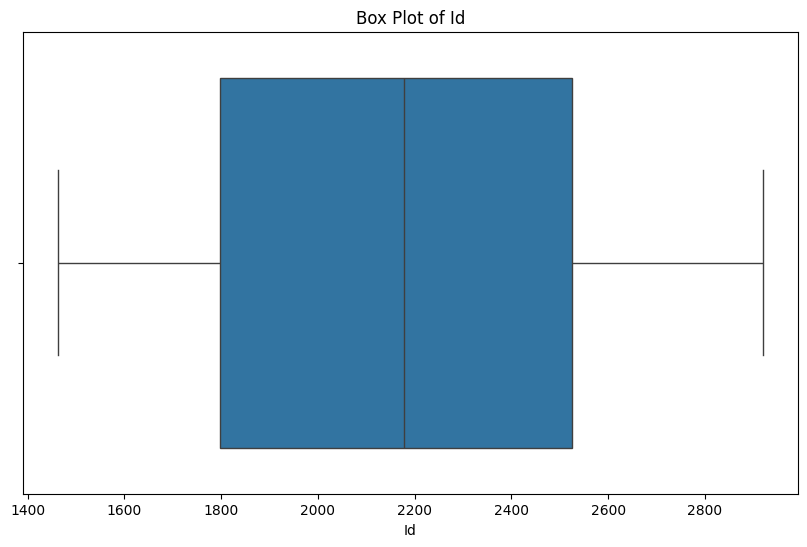

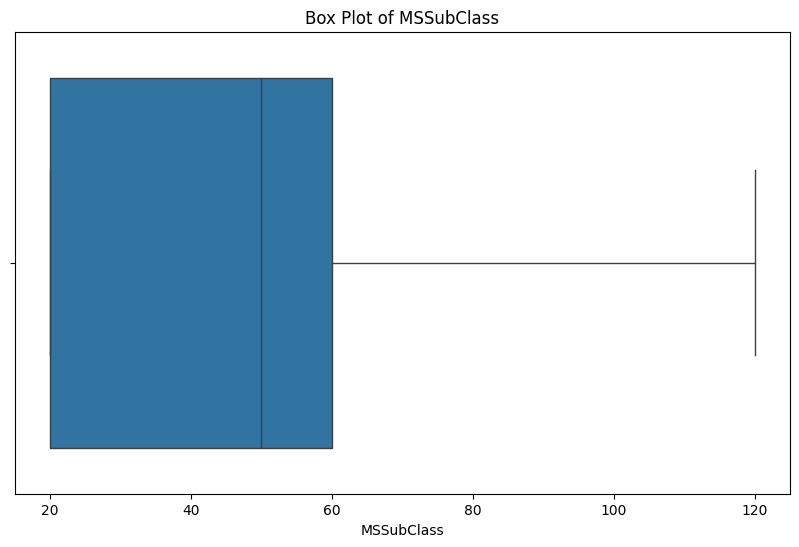

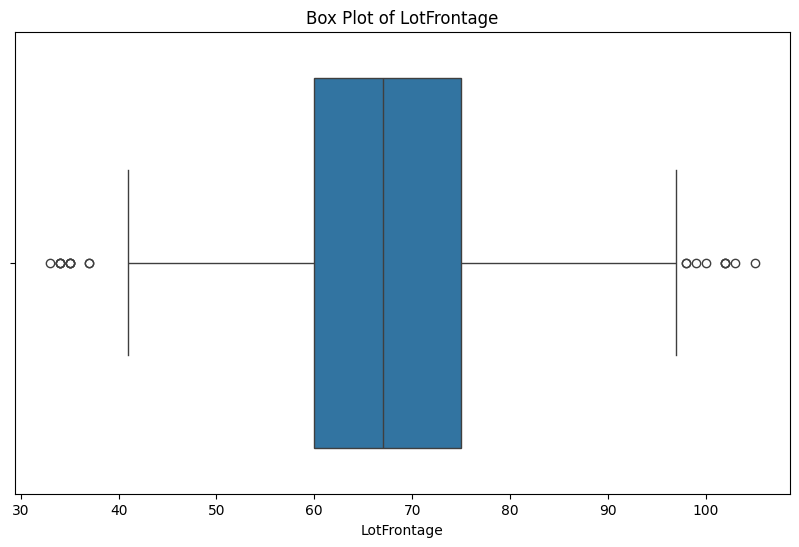

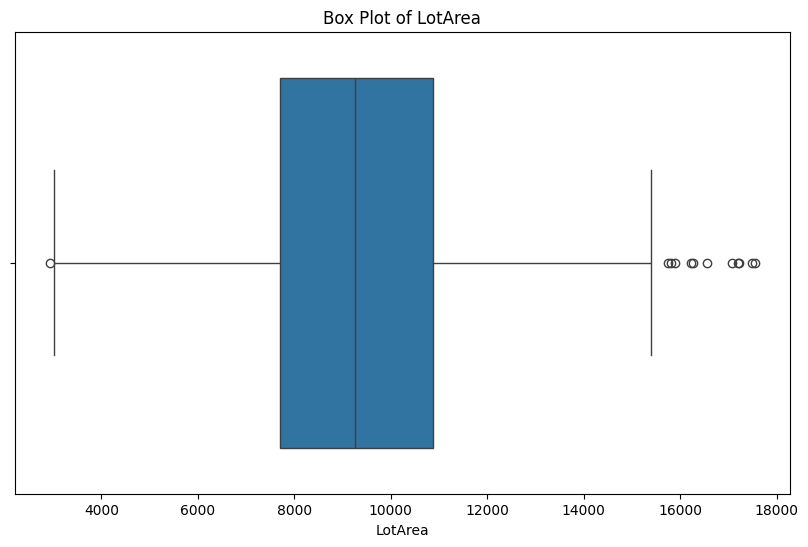

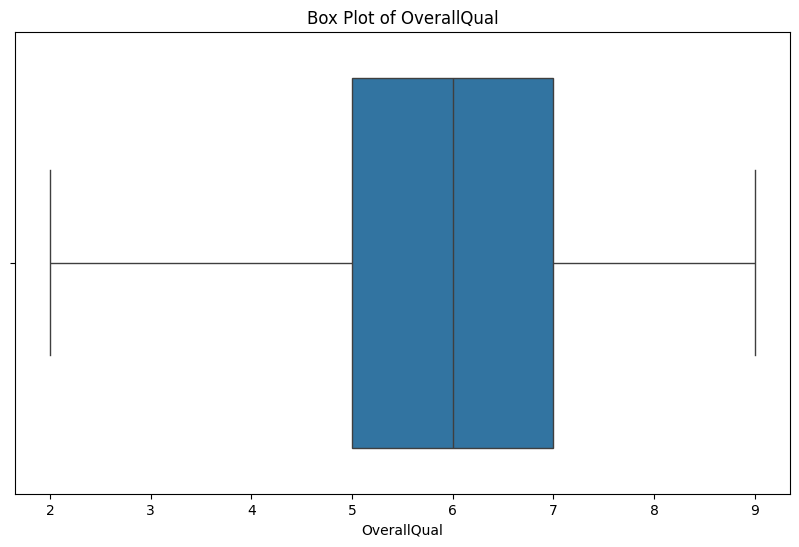

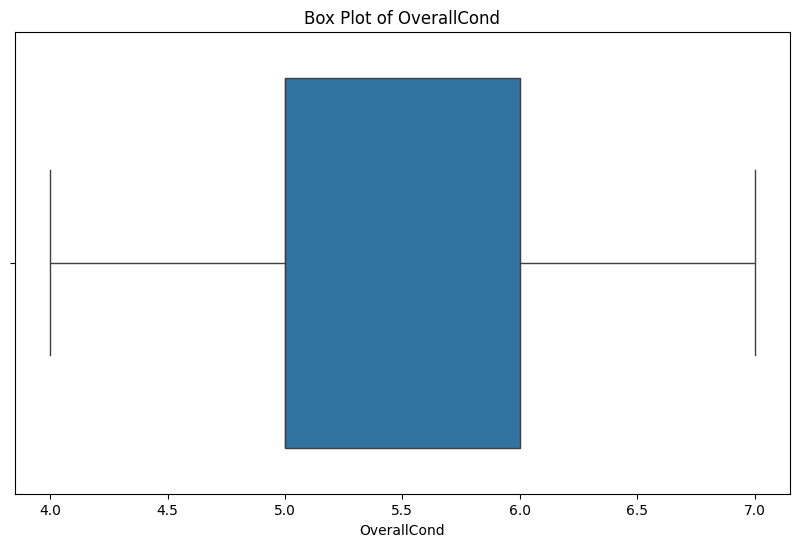

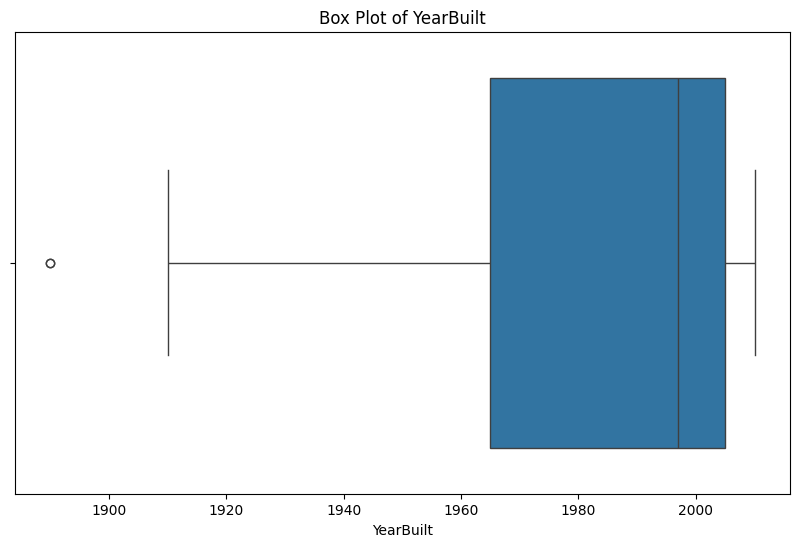

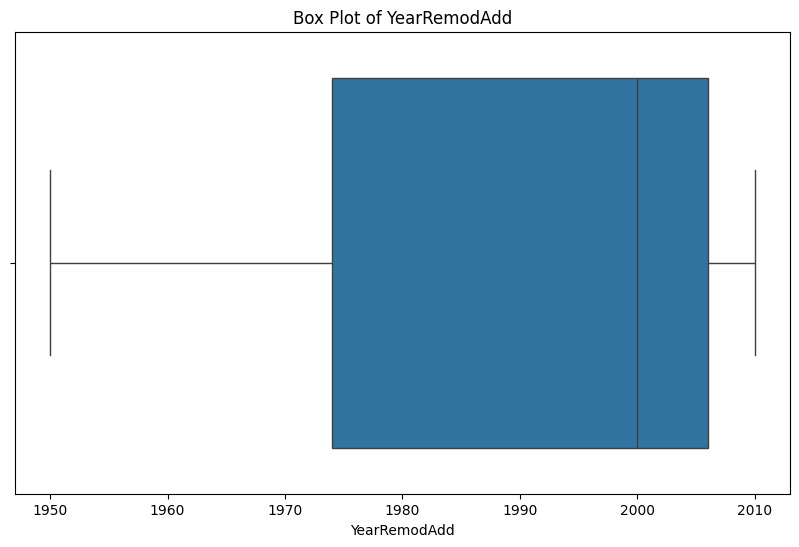

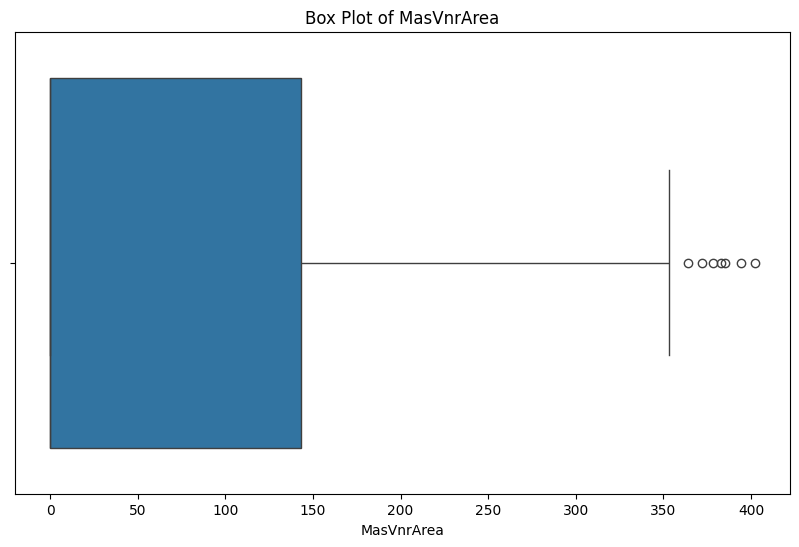

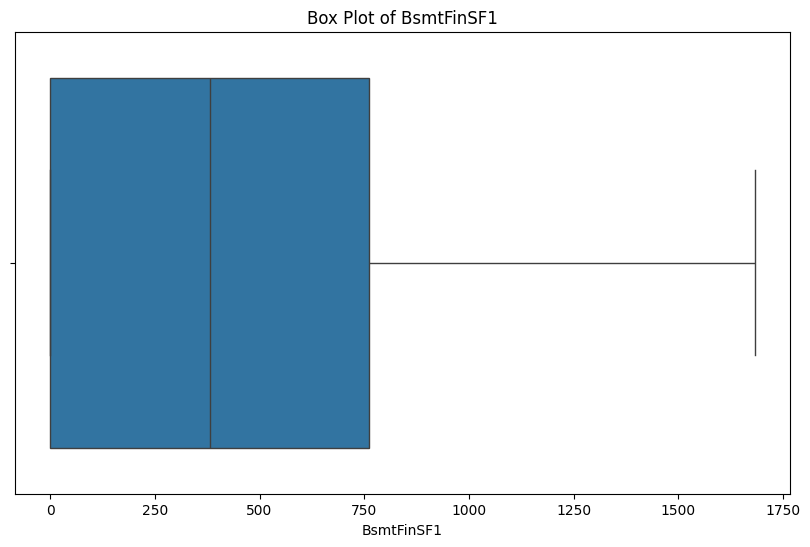

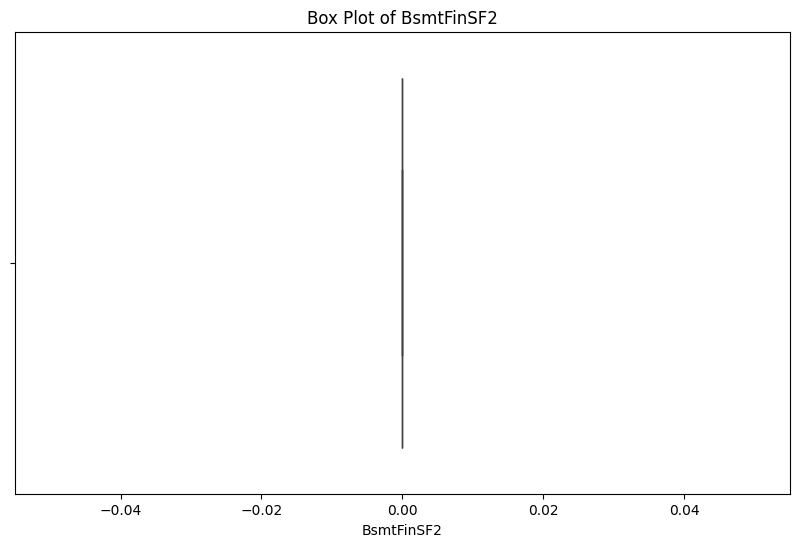

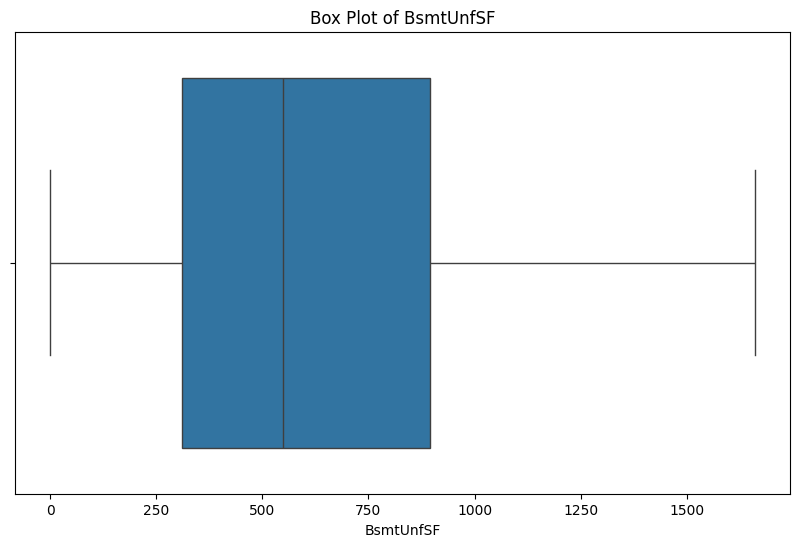

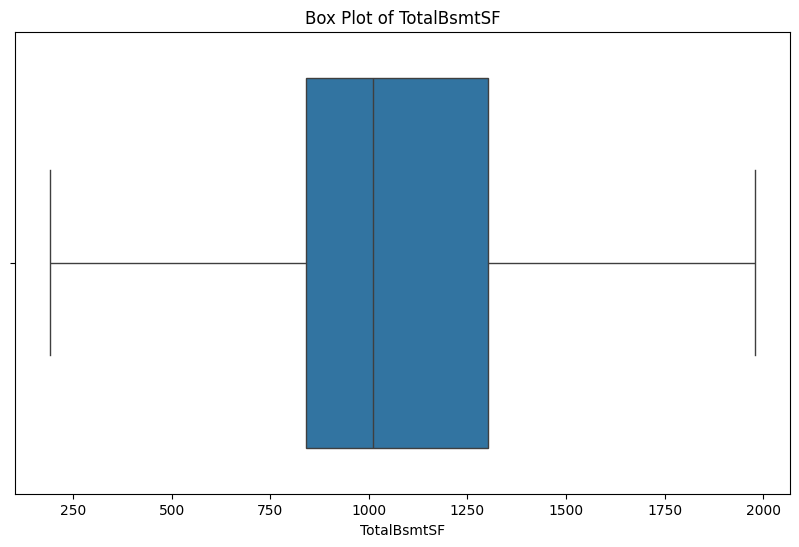

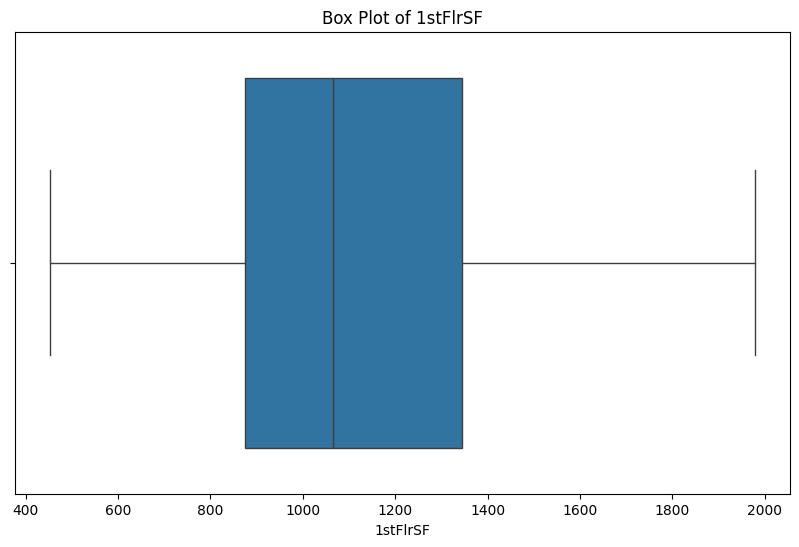

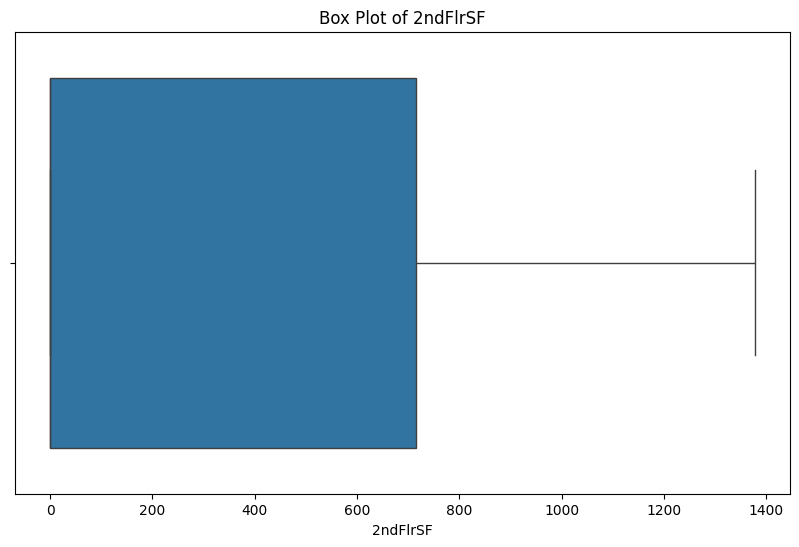

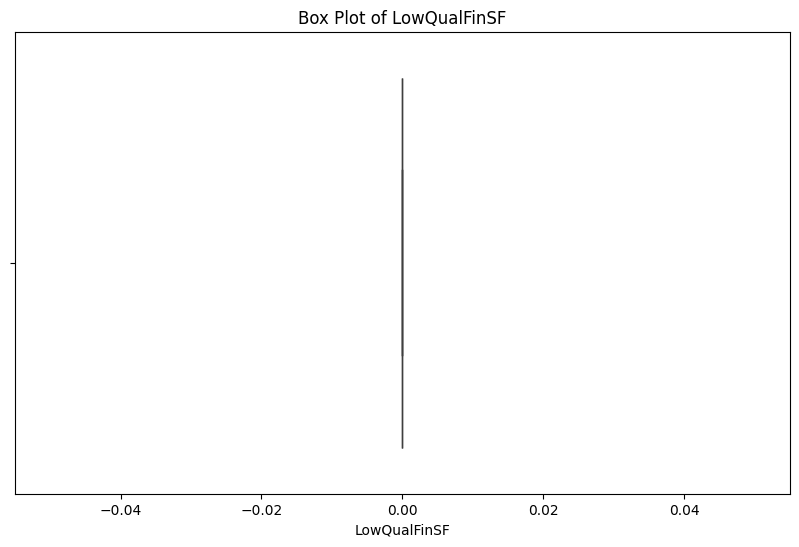

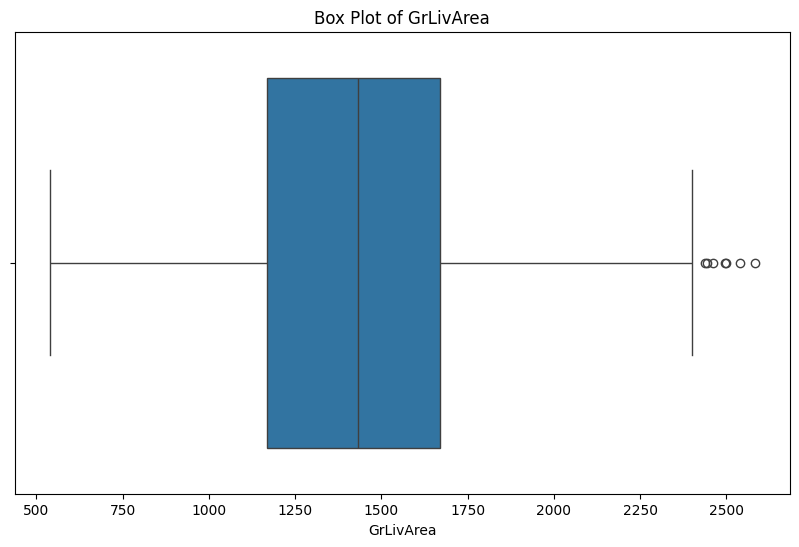

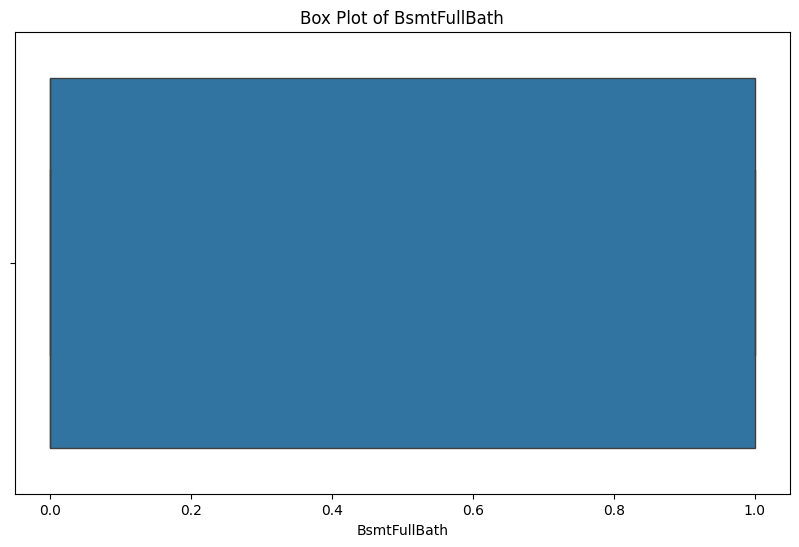

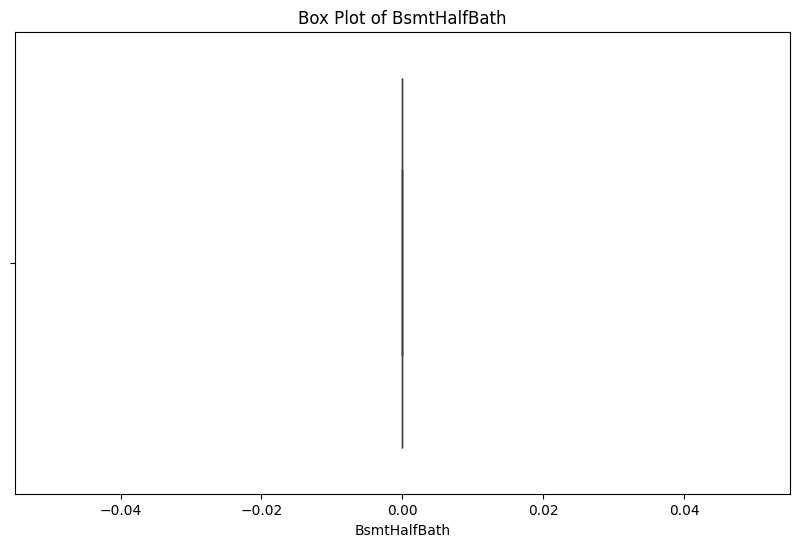

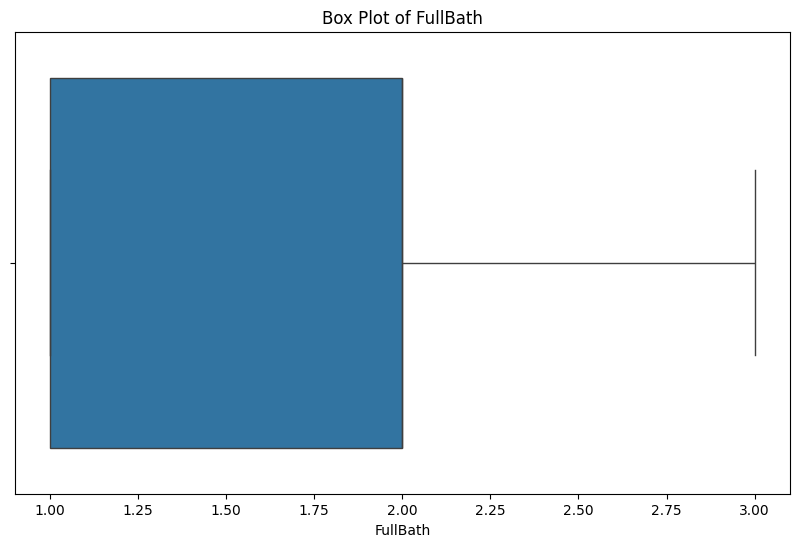

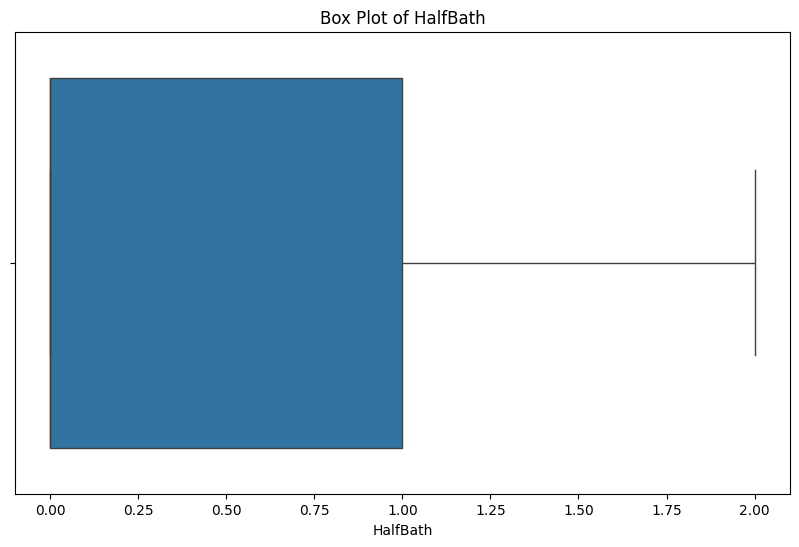

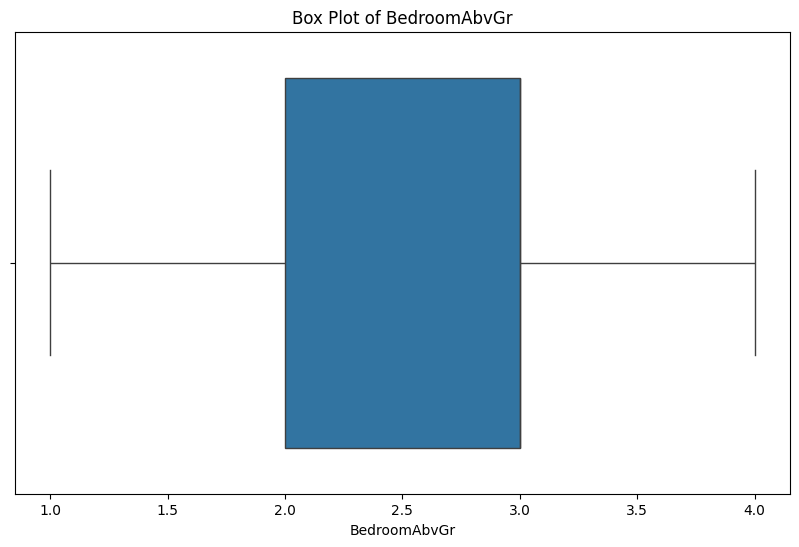

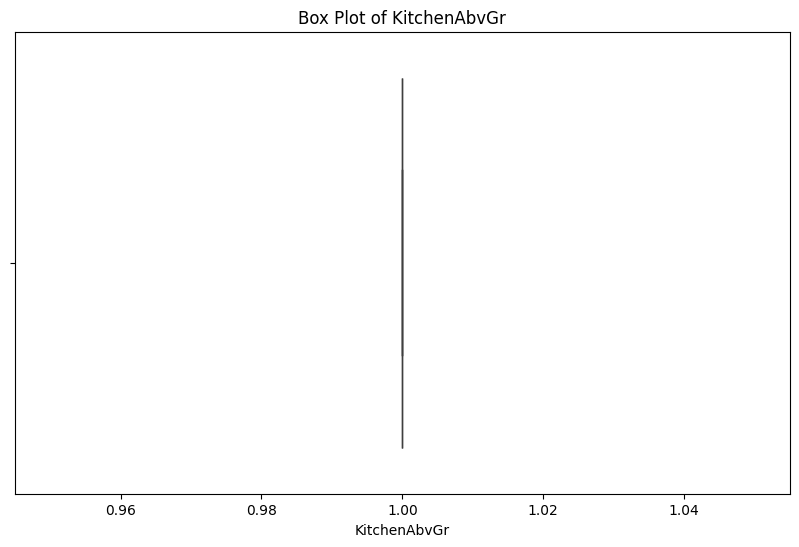

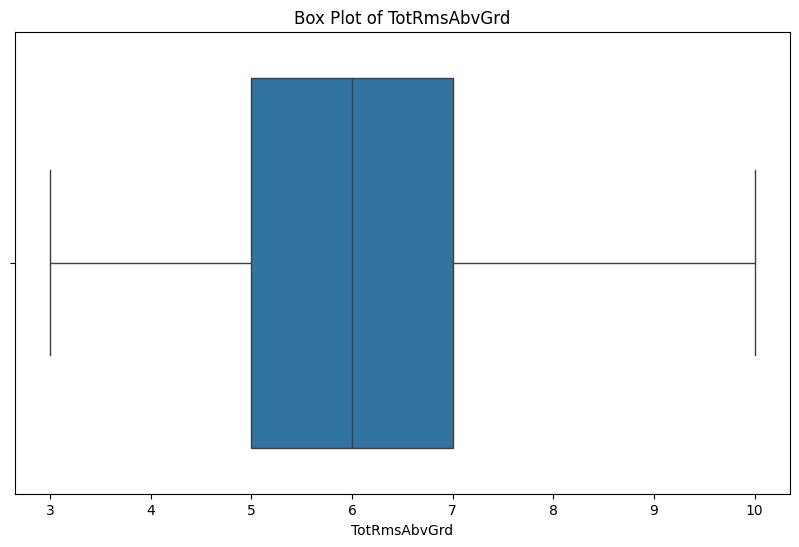

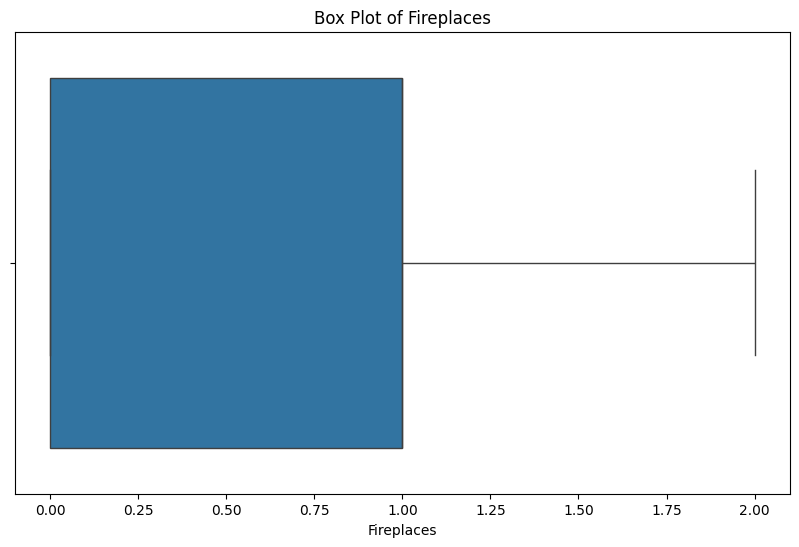

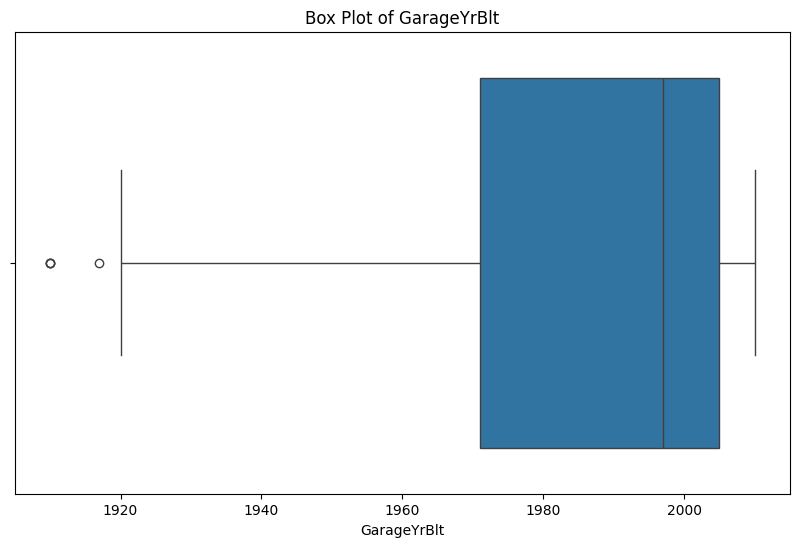

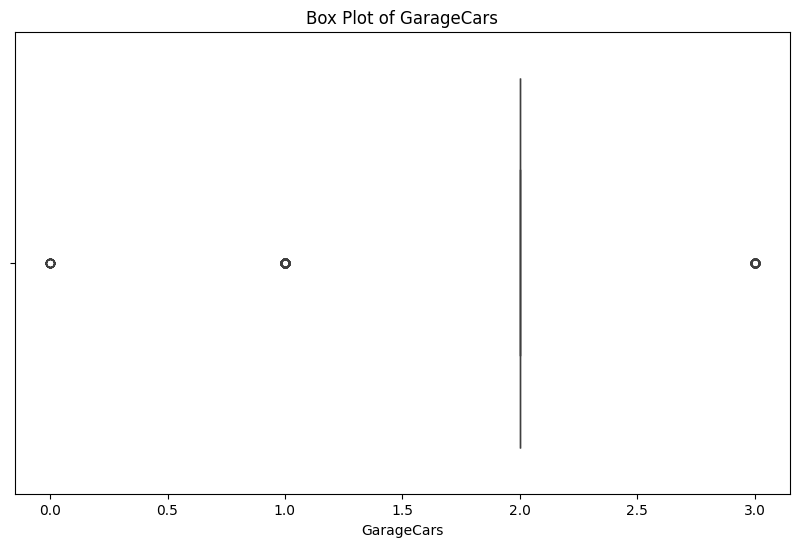

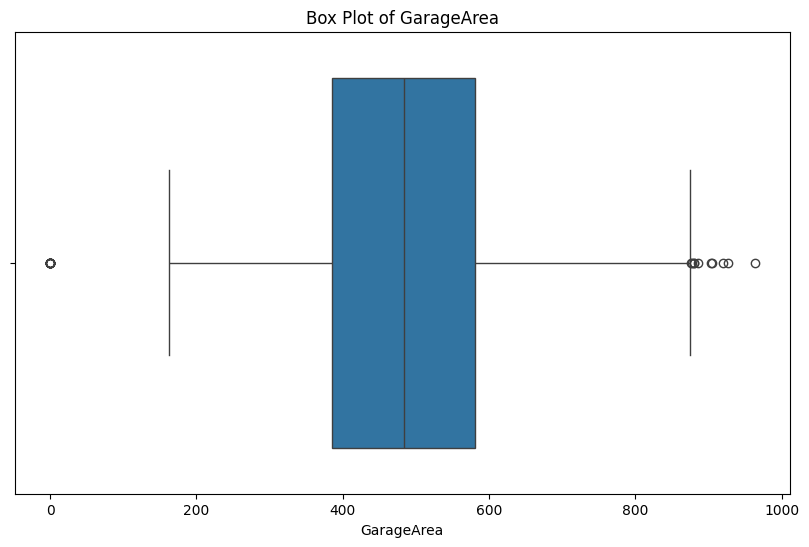

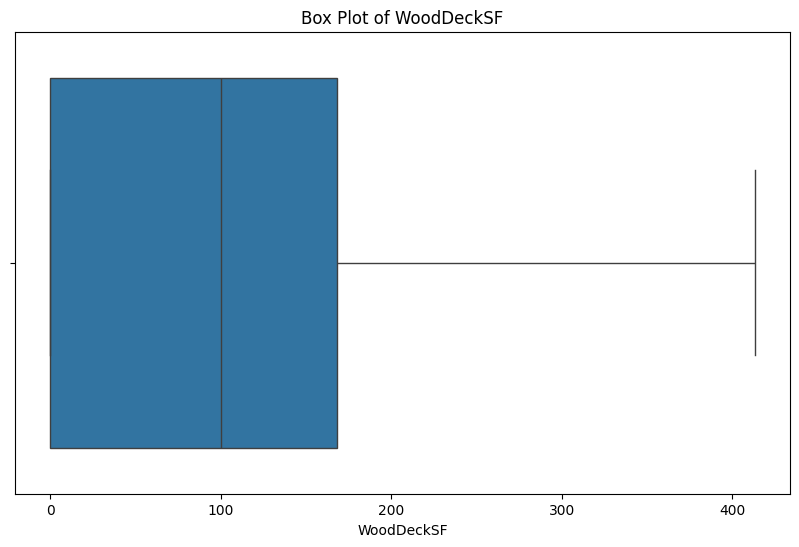

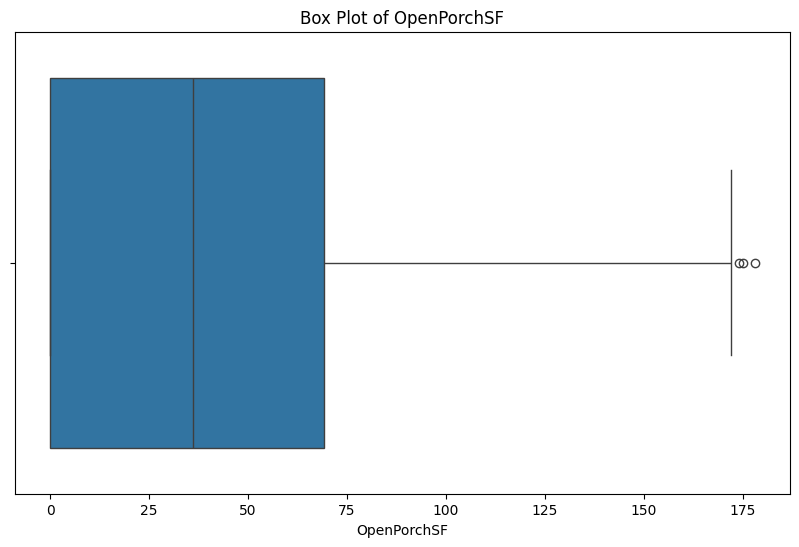

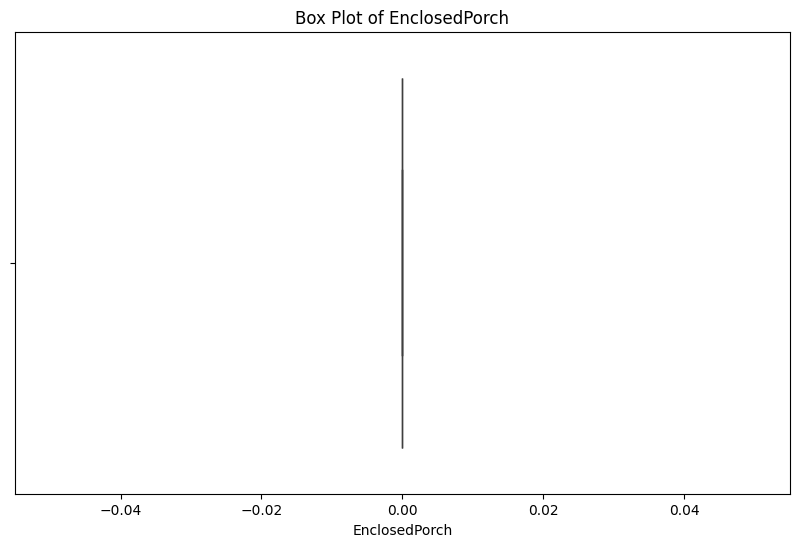

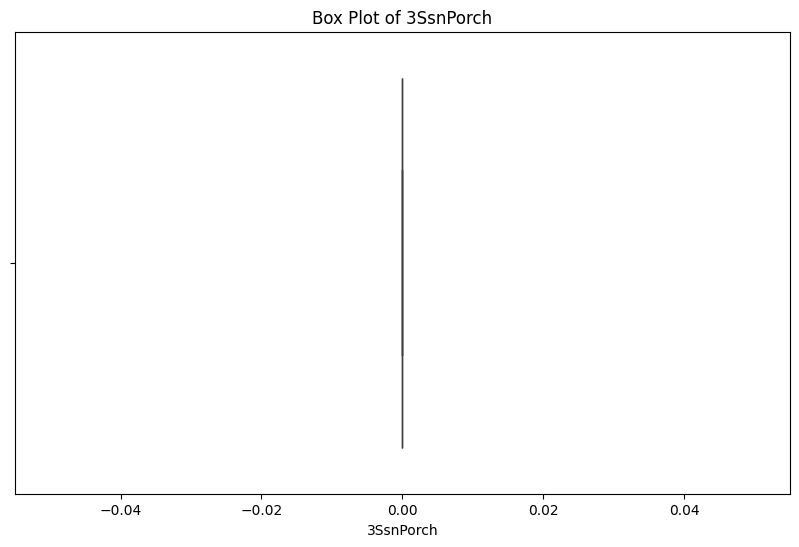

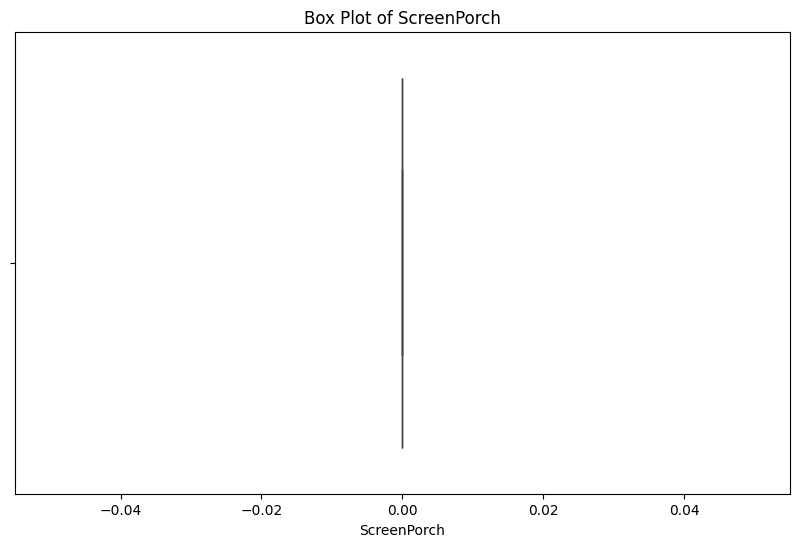

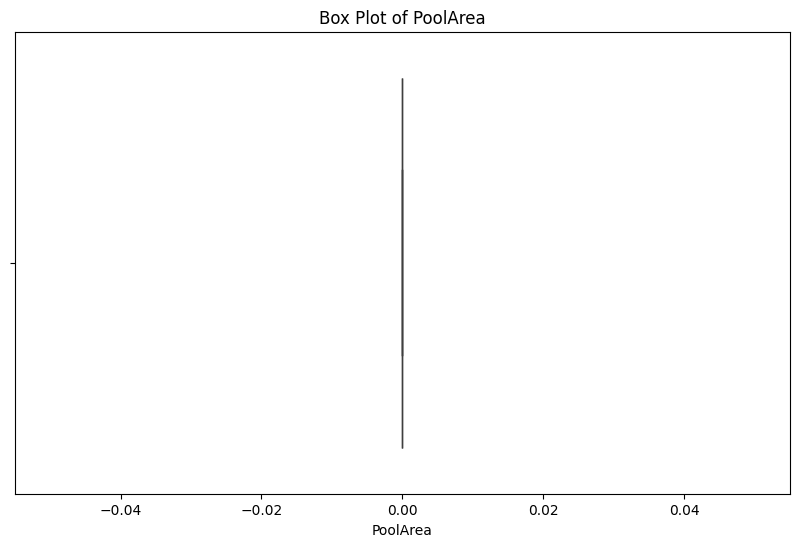

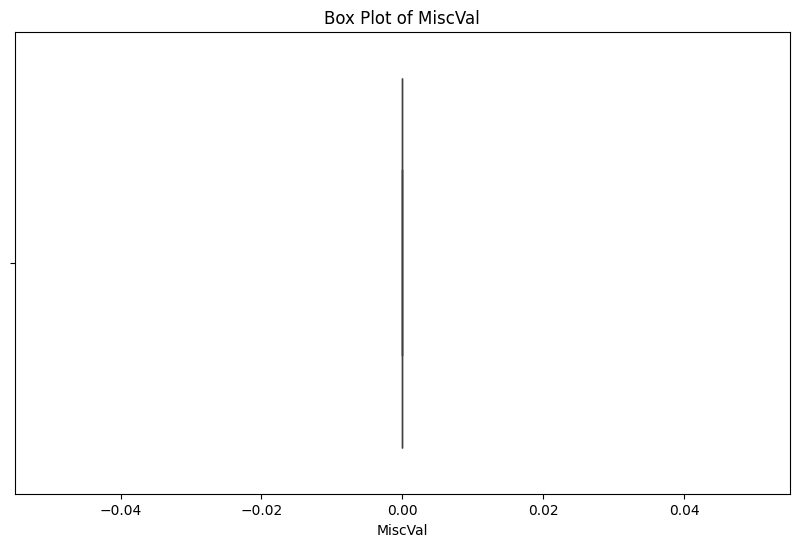

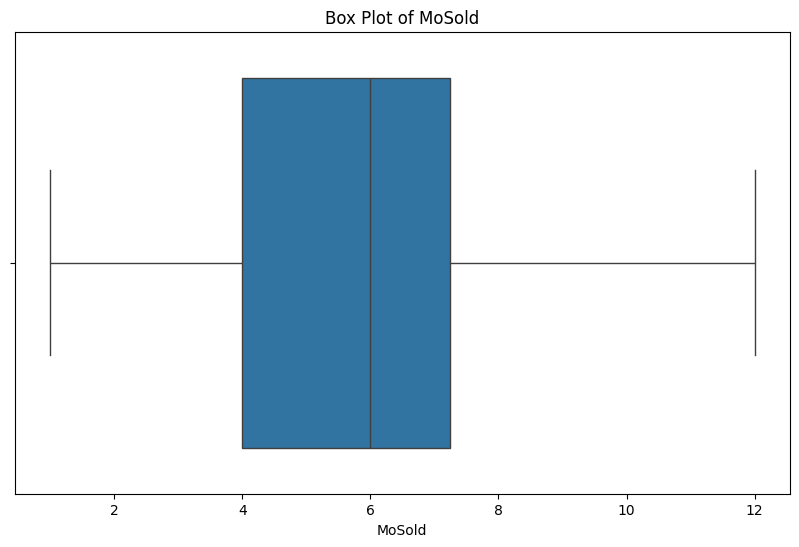

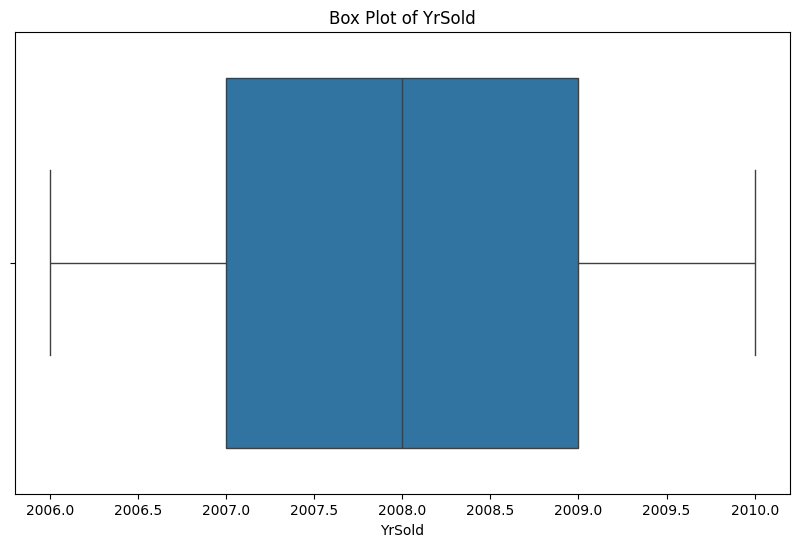

In [ ]:
# Memeriksa kembali Dataset apakah masih ada Outlier atau tidak
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=(df[feature]))
    plt.title(f'Box Plot of {feature}')
    plt.show()

Text(0.5, 1.0, 'Histogram sebelum Standardisasi')

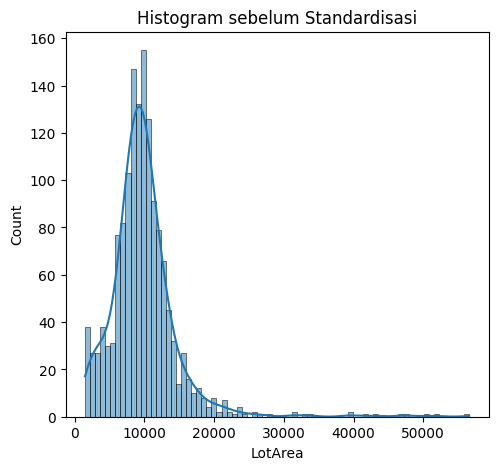

In [ ]:
# Melakukan Standardisasi pada Dataset karena membutuhan distribusi normal
from sklearn.preprocessing import StandardScaler

# Standardisasi fitur numeri
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Melakukan perbandingan antara data sebelum dan sesudah Standardisasi\
# Histogram sebelum Standardisasi
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(test[numeric_features[3]], kde=True)
plt.title('Histogram sebelum Standardisasi')

Text(0.5, 1.0, 'Histogram Sesudah Standardisasi')

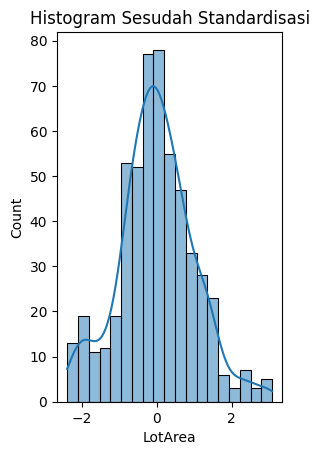

In [ ]:
# Histogram sesudah standardisasi
plt.subplot(1, 2, 2)
sns.histplot(df[numeric_features[3]], kde=True)
plt.title('Histogram Sesudah Standardisasi')

Standardisasi ini akan meningkatkan kinerja model dengan menyamakan skala fitur, mempercepat konvergensi algoritma optimasi, dan mengurangi risiko overfitting

In [ ]:
# Menangani duplikat data

# Mengidentifikasi baris duplikat
duplicates = df.duplicated()

print("Baris Duplikat: ")
print(df[duplicates])

Baris Duplikat: 
Empty DataFrame
Columns: [Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, MSZoning, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, SaleType, SaleCondition]
Index: []

[0 rows x 76 columns]


Tidak ada satupun terindifikasi sebagai duplikat.

In [ ]:
# Meliat data Kategoral pada Dataset
category_features = df.select_dtypes(include=['object']).columns
df[category_features]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,WD,Normal
5,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
7,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,Y,WD,Normal
8,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,Gd,Typ,Po,Attchd,Unf,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,C (all),Grvl,Reg,Bnk,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,...,TA,Typ,Gd,Attchd,Unf,TA,TA,N,WD,Normal
1438,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1442,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,Timber,Norm,Norm,...,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,New,Partial
1447,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,TA,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal


Kita akan menggunakan metode one hot encoding atau label encoding karena data kategorikal yang ada pada dataset ini tidak memiliki urutan.


In [ ]:
# Menggunakan One-Hot Encoding
df_one_hot = pd.get_dummies(df, columns=category_features)
df_one_hot

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
2,-1.722570,0.341547,0.470167,1.688834,-1.018737,-0.533366,0.502590,0.410035,-0.694087,0.892245,...,False,False,False,False,True,False,False,False,True,False
3,-1.720156,0.341547,0.775931,0.245917,-0.253277,0.917389,0.541615,0.410035,-0.500727,0.433286,...,False,False,False,False,True,False,False,False,True,False
5,-1.715328,0.341547,0.546608,0.254158,-0.253277,-0.533366,0.346490,0.208627,-0.694087,-1.028586,...,False,False,False,False,True,False,False,False,True,False
7,-1.710501,0.341547,-0.370682,-0.344435,-0.253277,-0.533366,0.541615,0.410035,-0.694087,-1.028586,...,False,False,False,False,True,False,False,False,True,False
8,-1.708087,-0.956631,1.311017,0.320086,0.512183,-0.533366,0.229415,0.007220,-0.694087,0.518278,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,1.731577,0.017003,-0.600004,-0.300234,-2.549656,-0.533366,-2.658432,-2.006858,-0.694087,-1.028586,...,False,False,False,False,True,False,False,False,True,False
1438,1.743646,-0.956631,0.164404,-0.076979,1.277642,-0.533366,0.658690,0.561091,-0.694087,-1.028586,...,False,False,False,False,True,False,False,False,True,False
1442,1.753301,-0.956631,2.075425,1.609421,1.277642,-0.533366,0.814790,0.812851,1.220175,2.249698,...,False,False,True,False,False,False,False,False,False,True
1447,1.765370,-0.956631,-0.752886,0.318587,-1.018737,2.368143,-0.629134,0.661795,-0.694087,0.042320,...,False,False,False,False,True,False,False,False,True,False


In [ ]:
# Menggunakan Label Encoding
from sklearn.preprocessing import LabelEncoder

# Inisilaisasi LabelEncoder
label_encoder = LabelEncoder()
df_lencoder = pd.DataFrame(df)

for col in category_features:
    df_lencoder[col] = label_encoder.fit_transform(df[col])

# Menampilkan hasil
df_lencoder

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
2,-1.722570,0.341547,0.470167,1.688834,-1.018737,-0.533366,0.502590,0.410035,-0.694087,0.892245,...,3,3,4,1,0,3,4,2,8,3
3,-1.720156,0.341547,0.775931,0.245917,-0.253277,0.917389,0.541615,0.410035,-0.500727,0.433286,...,2,3,2,1,0,3,4,2,8,3
5,-1.715328,0.341547,0.546608,0.254158,-0.253277,-0.533366,0.346490,0.208627,-0.694087,-1.028586,...,3,3,4,1,0,3,4,2,8,3
7,-1.710501,0.341547,-0.370682,-0.344435,-0.253277,-0.533366,0.541615,0.410035,-0.694087,-1.028586,...,3,3,2,1,0,3,4,2,8,3
8,-1.708087,-0.956631,1.311017,0.320086,0.512183,-0.533366,0.229415,0.007220,-0.694087,0.518278,...,2,3,3,1,2,3,4,2,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,1.731577,0.017003,-0.600004,-0.300234,-2.549656,-0.533366,-2.658432,-2.006858,-0.694087,-1.028586,...,3,3,2,1,2,3,4,0,8,3
1438,1.743646,-0.956631,0.164404,-0.076979,1.277642,-0.533366,0.658690,0.561091,-0.694087,-1.028586,...,2,3,2,1,1,3,4,2,8,3
1442,1.753301,-0.956631,2.075425,1.609421,1.277642,-0.533366,0.814790,0.812851,1.220175,2.249698,...,2,3,2,1,0,3,4,2,6,4
1447,1.765370,-0.956631,-0.752886,0.318587,-1.018737,2.368143,-0.629134,0.661795,-0.694087,0.042320,...,3,3,2,1,1,3,4,2,8,3


### Proses ExDA

In [ ]:
# Memeriksa kembali Dataset
df_lencoder.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
2,-1.722570,0.341547,0.470167,1.688834,-1.018737,-0.533366,0.502590,0.410035,-0.694087,0.892245,...,3,3,4,1,0,3,4,2,8,3
3,-1.720156,0.341547,0.775931,0.245917,-0.253277,0.917389,0.541615,0.410035,-0.500727,0.433286,...,2,3,2,1,0,3,4,2,8,3
5,-1.715328,0.341547,0.546608,0.254158,-0.253277,-0.533366,0.346490,0.208627,-0.694087,-1.028586,...,3,3,4,1,0,3,4,2,8,3
7,-1.710501,0.341547,-0.370682,-0.344435,-0.253277,-0.533366,0.541615,0.410035,-0.694087,-1.028586,...,3,3,2,1,0,3,4,2,8,3
8,-1.708087,-0.956631,1.311017,0.320086,0.512183,-0.533366,0.229415,0.007220,-0.694087,0.518278,...,2,3,3,1,2,3,4,2,8,3


In [ ]:
# Memeriksa jumlah dan presentasi missing values di setiap kolom
missing_values = df_lencoder.isnull().sum()
missing_percentage = (missing_values / len(df_lencoder)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

missing_data[missing_data['Missing Values'] > 0]    # Menampilkan kolom dengan missing values

,Missing Values,Missing Percentage


Tidak terdapat satu pun missing values, karena sudah ditangani pada tahap sebelumnya

## Analysis Desktiptif

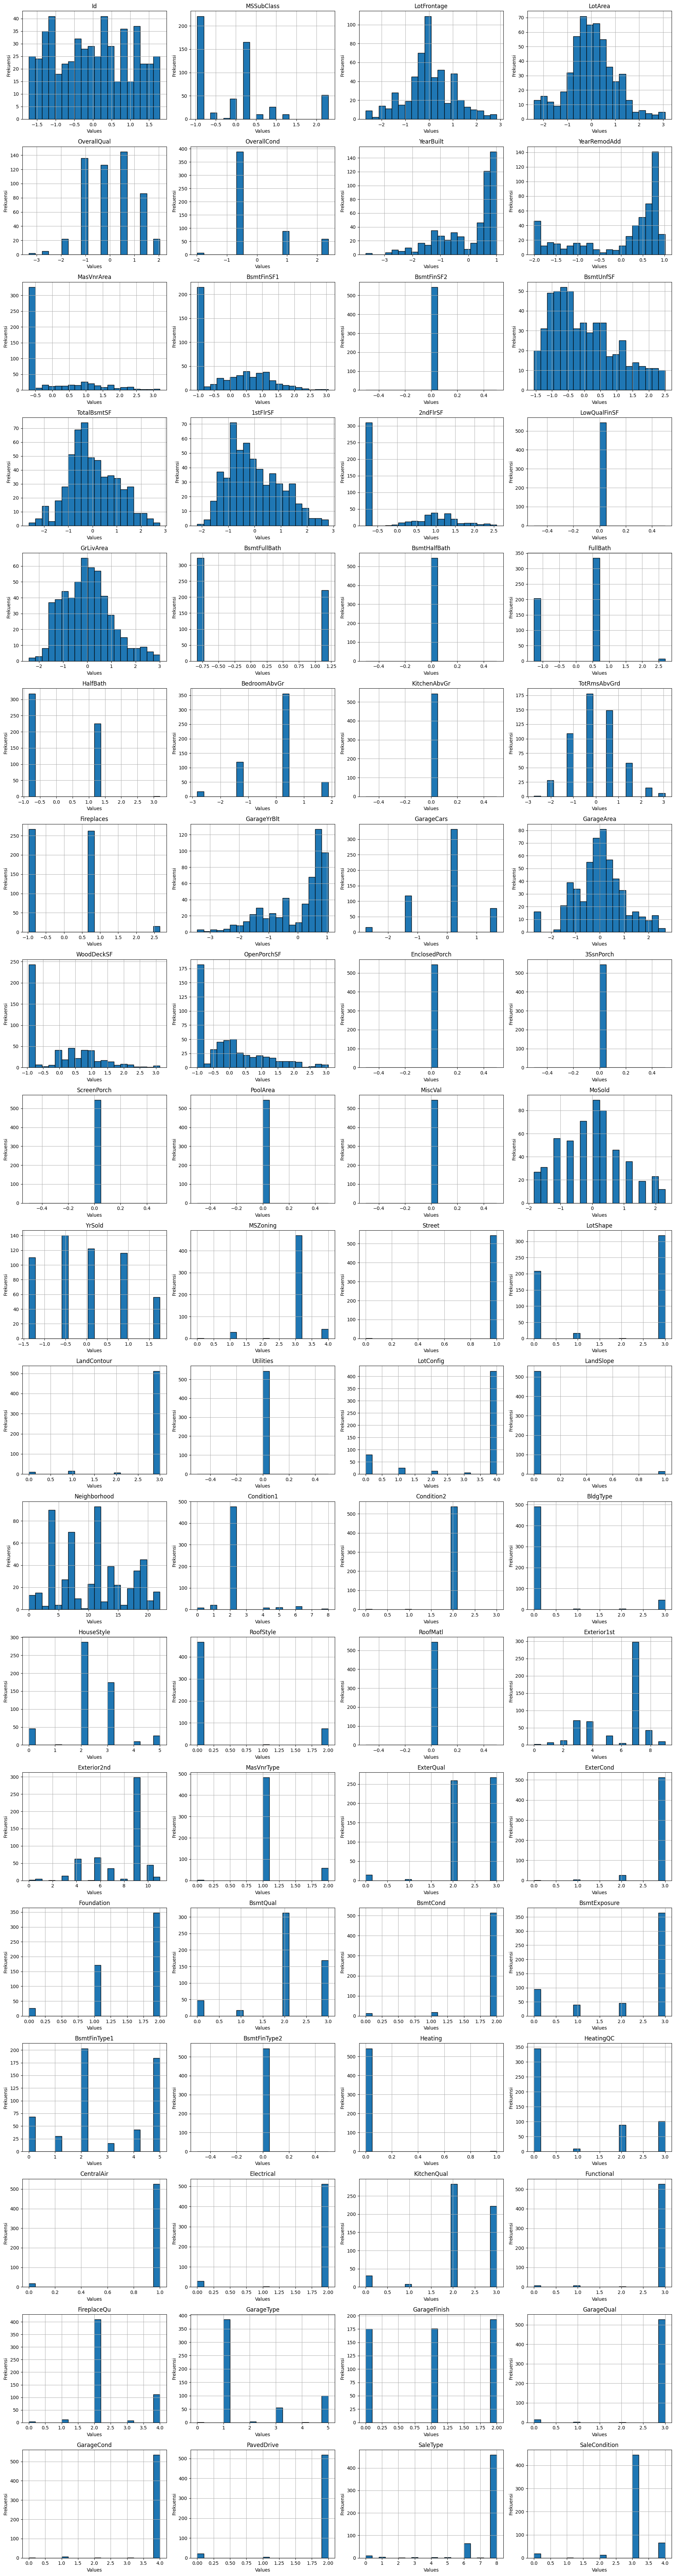

In [ ]:
# Menghitung jumlah variabel
num_vars = df_lencoder.shape[1]

# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4    #Jumlah kolom yang diinginkan
n_rows = -(-num_vars // n_cols)    # Menghitung jumlah baris yang diperlukan

# Membuat grid subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()

# Plot setiap variabel
for i, column in enumerate(df_lencoder.columns):
    df_lencoder[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frekuensi')

# Menghapus subplot yang tidak terpakai (jika ada)
for j in range (i + 1,len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi data untuk beberapa kolom
columns_to_plot = ['OverallQual', 'YearBuilt','LotArea', 'SaleType', 'SaleCondition']

plt.figure()